# AVANCE 1 Biogenesys

In [1]:
#Carga de las librerias 

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [2]:
#Carga de los datos
data = pd.read_csv ("data_latinoamerica.csv", sep=",")

In [3]:
#se imprimen los primeros datos para tener una primera imagen de la estructura de los mismos. 
data.head ()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

4) Comprueba que el dataset cargado tiene la cantidad de registros y columnas especificadas (Recuerda que hay una función para ello).

In [4]:
np.shape (data)

(12216057, 50)

5) elecciona los países donde se expandirán:

In [5]:
#creo una lista con los paises seleccionados:
Paises_seleccionados = ["Colombia", "Argentina", "Chile", "Mexico", "Peru" , "Brazil"]
#se crea un amascara por paises y 
data_latinoamerica = data[data["country_name"].isin(Paises_seleccionados)]



In [6]:
#se vuelve a ver la cantidad de datos, para ver si funcionó la mascara
np.shape (data_latinoamerica)

(11970289, 50)

como sigue siendo un dataset demasiado grande se prosigue a verificar la calidad de los datos y evaluar si es necesario limpiar o agregar algun otro filtro

In [7]:
#se le agrega un filtro para ver solos los valores mayores a 4000000 para ver los nulos mas grandes y luego se vera a detale los nulos
data_latinoamerica.isnull().sum() [data_latinoamerica.isnull().sum()>4000000]

MemoryError: Unable to allocate 525. MiB for an array with shape (46, 11970289) and data type bool

Considerando que un gran porcentaje de los datos son nulos se procede a hacer una limpieza mas profunda de los mismos

In [ ]:
#se filtra la columna location_key para ver sus datos
data_latinoamerica.location_key.value_counts ()

location_key
AR              991
MX_GRO_12040    991
MX_GRO_12031    991
MX_GRO_12032    991
MX_GRO_12033    991
               ... 
BR_PR_411880    991
BR_PR_411885    991
BR_PR_411890    991
BR_PR_411900    991
PE_UCA_0401     991
Name: count, Length: 12079, dtype: int64

In [ ]:
#En el paso anterior se ve que hay datos duplicados, por lo cual se procede a filtrar por la columna de codigo de pais y se imprimepara
data_latinoamerica_codigo = data_latinoamerica [data_latinoamerica["location_key"].isin(["AR","BR","CO","CL","MX","PE"])]

data_latinoamerica_codigo.shape

(5946, 50)

6) Filtra los datos en fechas mayores a 2021-01-01.

In [ ]:
#se aplica el filtro sobre la fecha dada

data_latinoamerica_codigo_fecha = data_latinoamerica_codigo [data_latinoamerica_codigo["date"] > "2021-01-01" ]

data_latinoamerica_codigo_fecha.shape

(3744, 50)

7) Compara a nivel de país para llenar valores faltantes.

In [ ]:
#se evalua si hay nulos ahora se le agrga un parametro mayor a 0 para ver todos los valores nulos
nulos_fecha = data_latinoamerica_codigo_fecha.isnull().sum() [data_latinoamerica_codigo_fecha.isnull().sum()>0]
print (nulos_fecha)
print (np.shape(data_latinoamerica_codigo_fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [ ]:
nulos_fecha.index

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

8) Realiza una limpieza preliminar de los datos, eliminando registros nulos y corrigiendo los tipos de datos donde sea necesario, trata con valores medios, valores anteriores o valores siguientes.

In [ ]:
#for pais in Paises_seleccionados:
 #  for j in data_latinoamerica_codigo_fecha:
  #      data_latinoamerica_codigo_fecha.loc[data_latinoamerica_codigo_fecha["country_name"]==pais, j] = data_latinoamerica_codigo_fecha [j].fillna(data_latinoamerica_codigo_fecha.iloc[data_latinoamerica_codigo_fecha["country_name"]==pais,j].mean())

#for pais in Paises_seleccionados:
  #  for j in nulos_fecha:
        # Filtrando por país
   #     mask = data_latinoamerica_codigo_fecha["country_name"] == pais
        # Calculando la media de la columna 'j' para el país específico
   #     mean_value = data_latinoamerica_codigo_fecha.loc[mask, j].mean()
        # Rellenando los valores nulos en la columna 'j' para el país específico con la media calculada
   #     data_latinoamerica_codigo_fecha.loc[mask, j] = data_latinoamerica_codigo_fecha.loc[mask, j].fillna(mean_value)

for pais in Paises_seleccionados:
    for columna in data_latinoamerica_codigo_fecha:
        if columna != 'country_name':  # No queremos llenar valores nulos en la columna 'País'
            moda = data_latinoamerica_codigo_fecha[data_latinoamerica_codigo_fecha['country_name'] == pais][columna].mode().iloc[0] if not data_latinoamerica_codigo_fecha[data_latinoamerica_codigo_fecha['country_name'] == pais][columna].mode().empty else np.nan
            data_latinoamerica_codigo_fecha.loc[data_latinoamerica_codigo_fecha['country_name'] == pais, columna] = data_latinoamerica_codigo_fecha.loc[data_latinoamerica_codigo_fecha['country_name'] == pais, columna].fillna(moda)

print(data_latinoamerica_codigo_fecha)

         location_key        date country_code country_name  new_confirmed  \
367                AR  2021-01-02           AR    Argentina         7767.0   
368                AR  2021-01-03           AR    Argentina         4934.0   
369                AR  2021-01-04           AR    Argentina        13953.0   
370                AR  2021-01-05           AR    Argentina        14085.0   
371                AR  2021-01-06           AR    Argentina        14496.0   
...               ...         ...          ...          ...            ...   
10253872           PE  2022-09-13           PE         Peru         1150.0   
10253873           PE  2022-09-14           PE         Peru            0.0   
10253874           PE  2022-09-15           PE         Peru            0.0   
10253875           PE  2022-09-16           PE         Peru            0.0   
10253876           PE  2022-09-17           PE         Peru            0.0   

          new_deceased  cumulative_confirmed  cumulative_deceas

In [ ]:
#se imprime nuevamente los nulos para ver que se hayan completado los valores corectamente
nulos_fecha = data_latinoamerica_codigo_fecha.isnull().sum() [data_latinoamerica_codigo_fecha.isnull().sum()>0]
print (nulos_fecha)
print (np.shape(data_latinoamerica_codigo_fecha))
#se logra ver que solo las ultimas dos columnas estan con nulos las cuales se pasará a analizar mas adelante 

new_recovered           1872
cumulative_recovered    2496
dtype: int64
(3744, 50)


Se pasa a guardar el archivo en fomrato csv 

In [ ]:
data_latinoamerica_codigo_fecha.to_csv ("datosfiltradosprimeraparte.csv",index=True)

Continuamos las siguientes consignas con el nuevo dataset (data_latinoamerica)

In [ ]:
data_latinoamerica_nuevo = pd.read_csv ("datosfiltradosprimeraparte.csv",sep= ",")

In [ ]:
#Se ejecuta para ver los datos de las columnas agregadas a la variable

for i in data_latinoamerica.columns:
    print (i)
    print (data_latinoamerica[i].describe())
    print ("_________________________________________________") #se ejecuta este print para dividir cada columna y facilitar la legibilidad 

location_key
count     11970289
unique       12079
top             AR
freq           991
Name: location_key, dtype: object
_________________________________________________
date
count       11970289
unique           991
top       2020-01-01
freq           12079
Name: date, dtype: object
_________________________________________________
country_code
count     11970289
unique           6
top             BR
freq       5565456
Name: country_code, dtype: object
_________________________________________________
country_name
count     11970289
unique           6
top         Brazil
freq       5565456
Name: country_name, dtype: object
_________________________________________________
new_confirmed
count    6.350006e+06
mean     3.030837e+01
std      7.715224e+02
min     -7.390700e+04
25%      0.000000e+00
50%      0.000000e+00
75%      4.000000e+00
max      2.984080e+05
Name: new_confirmed, dtype: float64
_________________________________________________
new_deceased
count    6.308501e+06
mean 

SE PUDO OBSERVAR EN 

In [ ]:
#Se cambia el tipo de dato de fecha 
data_latinoamerica ["date"] = pd.to_datetime(data_latinoamerica["date"], format="%Y-%m-%d")

C:\Users\win10\AppData\Local\Temp\ipykernel_8368\1620443720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica ["date"] = pd.to_datetime(data_latinoamerica["date"], format="%Y-%m-%d")


In [ ]:
#se imprime el tipo de datos para ver que se haya cambiado el formato
print (data_latinoamerica["date"].dtypes)

datetime64[ns]


In [ ]:
data_latinoamerica ["date"] = pd.to_datetime(data_latinoamerica["date"], format="%Y-%m-%d")

C:\Users\win10\AppData\Local\Temp\ipykernel_8368\2192784844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica ["date"] = pd.to_datetime(data_latinoamerica["date"], format="%Y-%m-%d")


12) Crea una función que permita obtener la mediana, varianza y el rango.

In [ ]:
def calculos_primarios (data):
    for i in data:
        if data[i].dtype == "float64" or data[i].dtype == "int64":
            print (i)
            print ("Mediana: ", data[i].median())
            print ("Moda: ", data[i].mode())
            print ("Varianza: ", data[i].var())
            print ("Maximo: ", data[i].max())
            print ("Minimo: ",data[i].min())
            print ("Rango: ",data[i].max() - data[i].min())
            print ("________________________")#Se imprime esta fila para dividir la infomracion por columnas y facilitar la legibilidad 
calculos_primarios (data_latinoamerica)

new_confirmed
Mediana:  0.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
Varianza:  595246.7653984141
Maximo:  298408.0
Minimo:  -73907.0
Rango:  372315.0
________________________
new_deceased
Mediana:  0.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
Varianza:  312.13909595961445
Maximo:  11447.0
Minimo:  -4109.0
Rango:  15556.0
________________________
cumulative_confirmed
Mediana:  602.0
Moda:  0    0.0
Name: cumulative_confirmed, dtype: float64
Varianza:  71016641222.67618
Maximo:  34568833.0
Minimo:  0.0
Rango:  34568833.0
________________________
cumulative_deceased
Mediana:  12.0
Moda:  0    0.0
Name: cumulative_deceased, dtype: float64
Varianza:  47630952.815569185
Maximo:  685203.0
Minimo:  0.0
Rango:  685203.0
________________________
cumulative_vaccine_doses_administered
Mediana:  14975.0
Moda:  0    1.0
Name: cumulative_vaccine_doses_administered, dtype: float64
Varianza:  194256660776971.47
Maximo:  347868481.0
Minimo:  0.0
Rango:  347868481.0
________________

Se logra ver que los nuevos confimrados el minimo es un numero negativo, y no puede haber numero negativo en la columna, ya que no tiene logica. Despues se ve en la moda de nuevas muertes que la mayor parte de los dias no hay decesos por covid, pero a su vez el maximo es demasiado alto ya que hay mas de 11000 muertes por dia (lo vi desde la ventana de variables y es demasiado alto y un suceso unico en colombia, ya que luego el maximo no llega a 5000 muertes diarias)


¿Qué representa la mediana?

Representa el valor medio de los valores obtenidos

¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango? 

Aprimera vista no se logra ver ningun patron entre el rango y la varianza, ya que son demasiado dispersos los datos

¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?



# Avance 2 Biogenesys

2) Importa las librerías que necesites utilizar en este avance.

In [ ]:
# Se importa las extenciones que se pueden llegar a necesitar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#import pip
#pip.main(["install","matplotlib"])

In [ ]:
#Se abre el dataset que se va a utilizar 
Data_latinoamerica_nuevo = pd.read_csv ("datosfiltradosprimeraparte.csv",sep= ",")

In [ ]:
#Se abre nuevamente la informacion 
for i in Data_latinoamerica_nuevo:
    print (i)
    print (Data_latinoamerica_nuevo[i].describe())
    print ("______________________________________")
    
    

Unnamed: 0
count    3.744000e+03
mean     5.190546e+06
std      3.722908e+06
min      3.670000e+02
25%      5.506838e+05
50%      6.296006e+06
75%      7.746334e+06
max      1.025388e+07
Name: Unnamed: 0, dtype: float64
______________________________________
location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
______________________________________
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
______________________________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
______________________________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
______________________________________
new_confirmed
count      3744.000000
mean      13863.400374
std       24225.379296
min        -573.000000
25%        1512.500000


In [ ]:
#Se crea una variable con los nombres de laos paises para tenerlos para los graficos
Nombre_Paises_Nuevo = ["Colombia", "Argentina", "Chile", "Mexico", "Peru" , "Brazil"]

In [ ]:
Data_latinoamerica_nuevo ["date"] = pd.to_datetime (Data_latinoamerica_nuevo["date"])
Data_latinoamerica_nuevo.set_index("date")

Unnamed: 0 location_key country_code country_name  new_confirmed  \
date                                                                           
2021-01-02         367           AR           AR    Argentina         7767.0   
2021-01-03         368           AR           AR    Argentina         4934.0   
2021-01-04         369           AR           AR    Argentina        13953.0   
2021-01-05         370           AR           AR    Argentina        14085.0   
2021-01-06         371           AR           AR    Argentina        14496.0   
...                ...          ...          ...          ...            ...   
2022-09-13    10253872           PE           PE         Peru         1150.0   
2022-09-14    10253873           PE           PE         Peru            0.0   
2022-09-15    10253874           PE           PE         Peru            0.0   
2022-09-16    10253875           PE           PE         Peru            0.0   
2022-09-17    10253876           PE           PE         Peru            0.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2022-09-13          22.0             4127612.0             216173.0   
2022-09-14          29.0             3569026.0             206891.0   
2022-09-15          29.0             3569026.0             206891.0   
2022-09-16          29.0             3569026.0             206891.0   
2022-09-17          29.0             3569026.0             206891.0   

            cumulative_vaccine_doses_administered  population  ...  \
date                                                           ...   
2021-01-02                                20334.0  44938712.0  ...   
2021-01-03                                20529.0  44938712.0  ...   
2021-01-04                                25164.0  44938712.0  ...   
2021-01-05                                29852.0  44938712.0  ...   
2021-01-06                                34162.0  44938712.0  ...   
...                                           ...         ...  ...   
2022-09-13                                 3762.0  29381884.0  ...   
2022-09-14                                 3762.0  29381884.0  ...   
2022-09-15                                 3762.0  29381884.0  ...   
2022-09-16                                 3762.0  29381884.0  ...   
2022-09-17                                 3762.0  29381884.0  ...   

            population_largest_city  area_rural_sq_km  area_urban_sq_km  \
date                                                                      
2021-01-02               15057273.0         2690269.0           55032.0   
2021-01-03               15057273.0         2690269.0           55032.0   
2021-01-04               15057273.0         2690269.0           55032.0   
2021-01-05               15057273.0         2690269.0           55032.0   
2021-01-06               15057273.0         2690269.0           55032.0   
...                             ...               ...               ...   
2022-09-13               10554712.0         1256339.0           16425.0   
2022-09-14               10554712.0         1256339.0           16425.0   
2022-09-15               10554712.0         1256339.0           16425.0   
2022-09-16               10554712.0         1256339.0           16425.0   
2022-09-17               10554712.0         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                 

4. c. Mapas de calor para identificar correlaciones entre diferentes variables.
Matriz de correlación, trata de crear una submascara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5.

In [ ]:
#Se crea la matriz de correlacion de las variables numericas 
columnas_numericas = Data_latinoamerica_nuevo.select_dtypes (include= ["Float64", "int64"]).columns
matriz_correlacion = Data_latinoamerica_nuevo [columnas_numericas].corr()
#Se crea la mascara para el triangulo suerior
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))
#mostramos valores mayores a 0.5 para mostrar las correlaciones mas fuertes sinembargo tambien se pueden mostrar valores negativos
matriz_correlacion = matriz_correlacion [abs(matriz_correlacion > abs (0.05))]



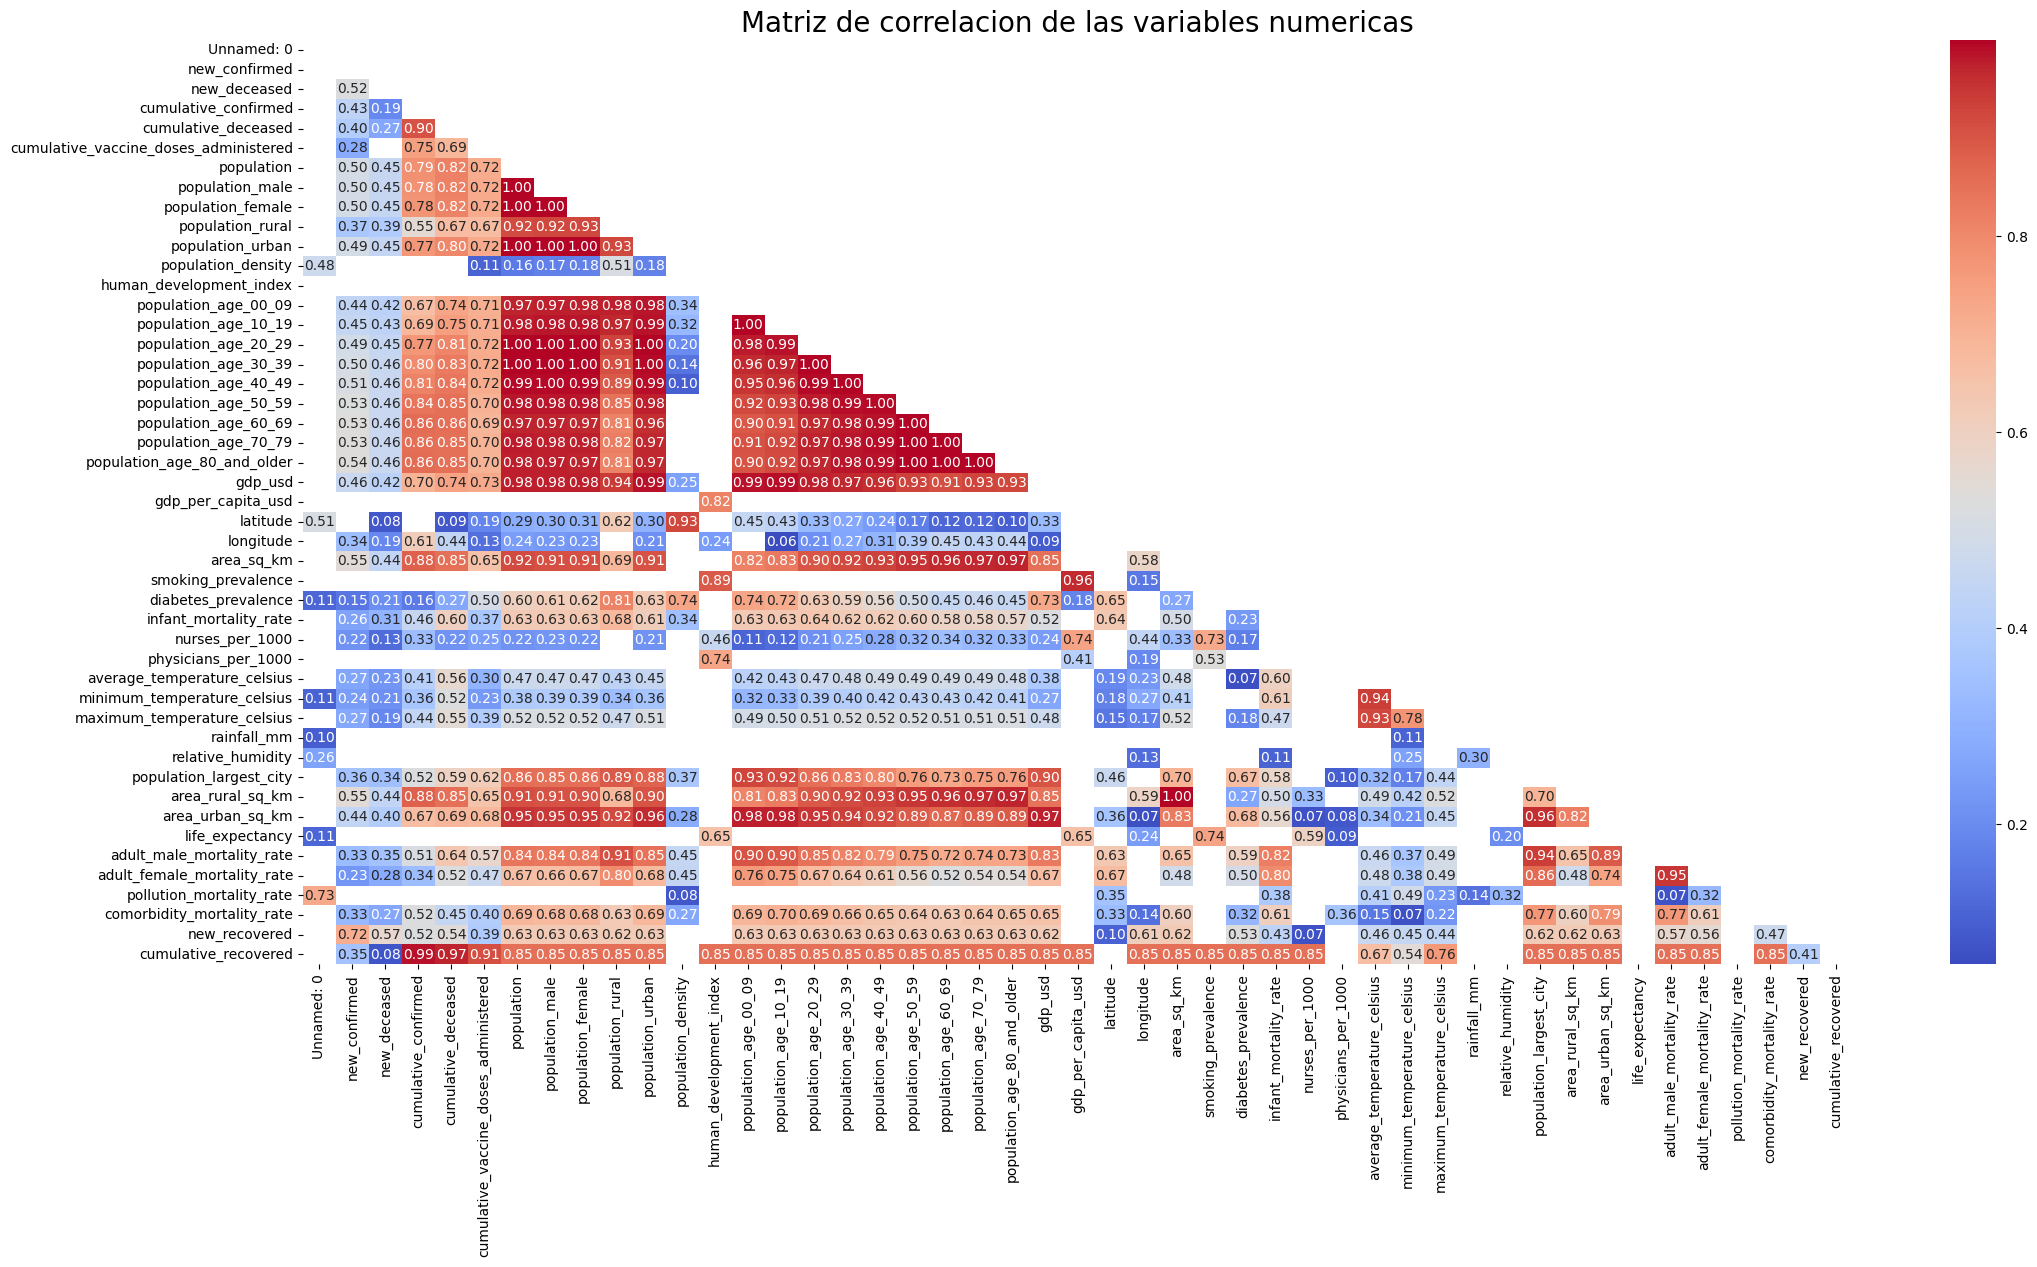

In [ ]:
#Se realiza la grafica

plt.figure (figsize=(25,12))
heatmap = sns.heatmap(matriz_correlacion , mask=mask , annot=True , cmap="coolwarm" , fmt=".2f")
plt.title("Matriz de correlacion de las variables numericas", fontsize=20)


plt.show()




4) A. Histogramas gráficos de densidad y gráficos de densidad para entender la distribución de la incidencia de COVID-19 y las tasas de vacunación.

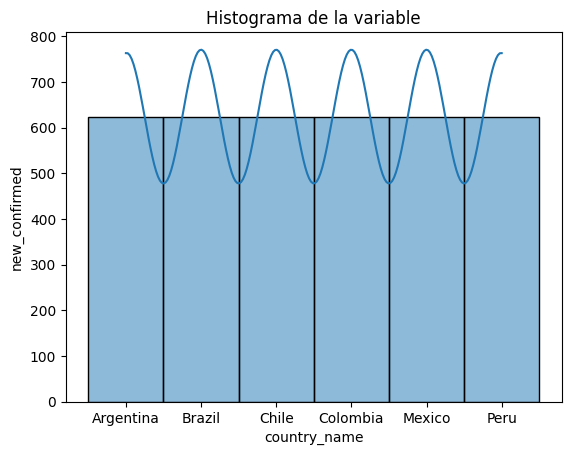

In [ ]:

sns.histplot(Data_latinoamerica_nuevo['country_name'], bins=20, kde=True)
plt.title('Histograma de la variable')
plt.xlabel('country_name')
plt.ylabel('new_confirmed')
plt.show()

4. B. Gráficos de barras para comparar diferentes regiones.
Gráficos de barras de países contra el resto de variables.

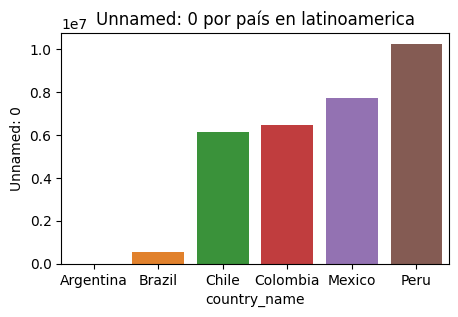

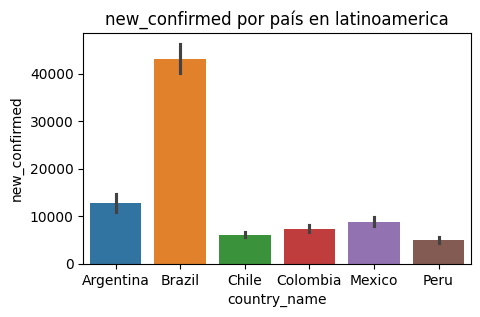

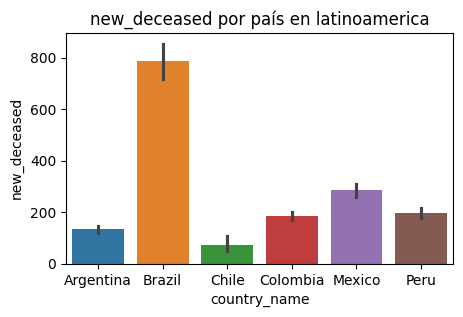

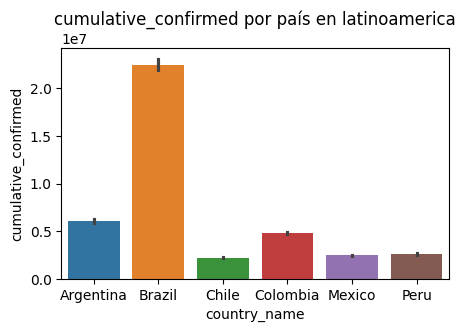

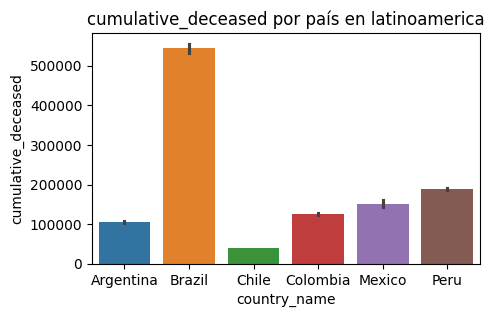

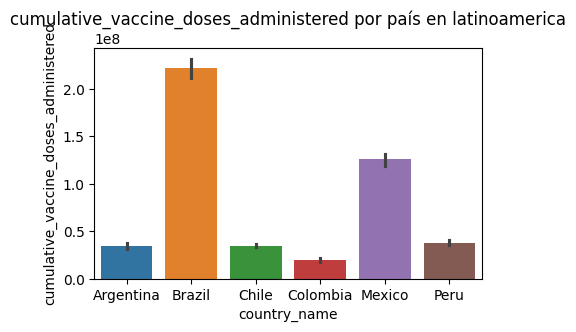

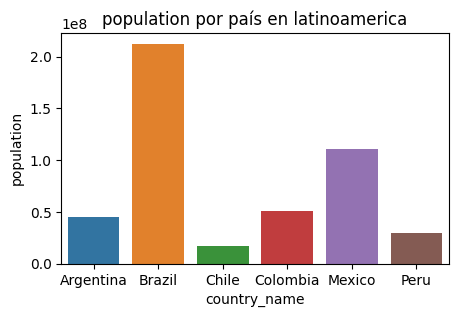

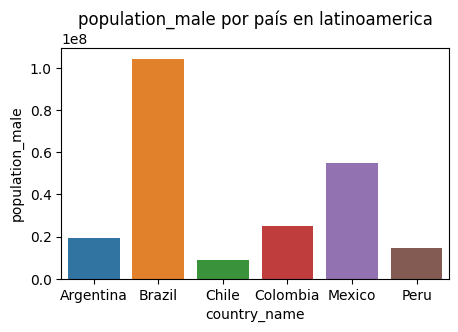

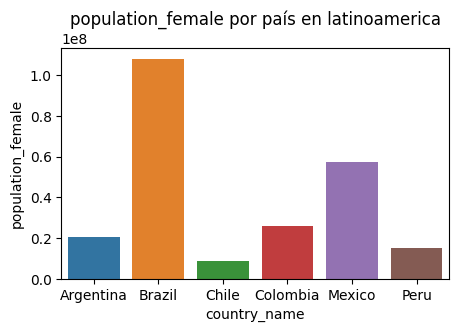

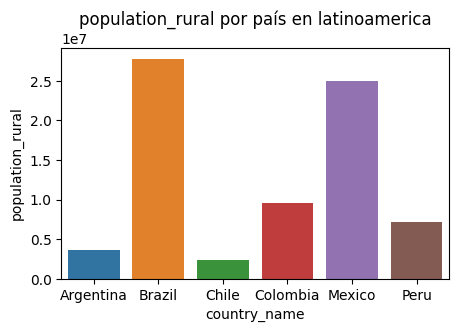

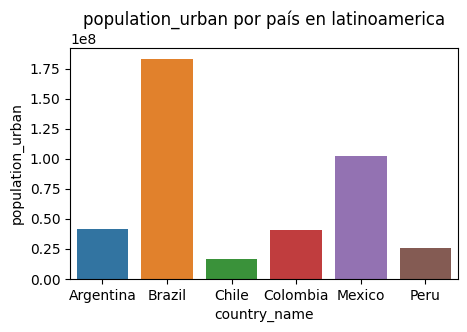

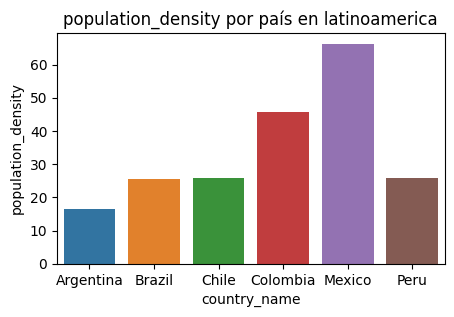

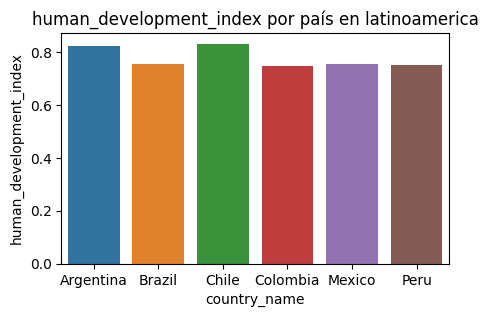

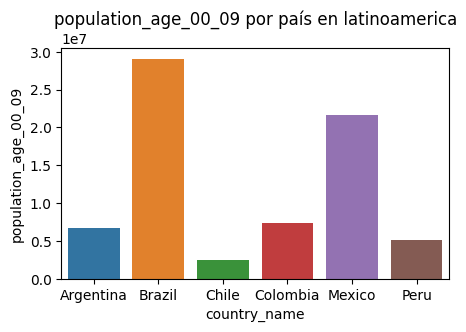

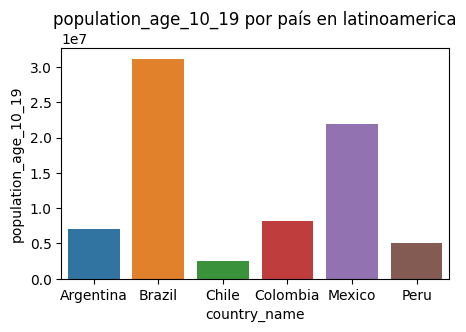

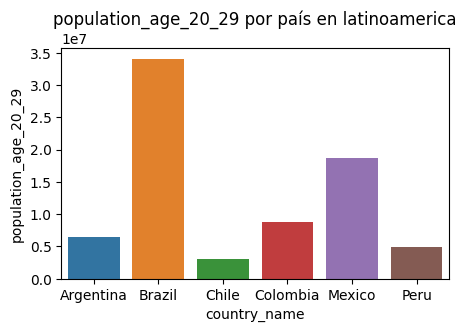

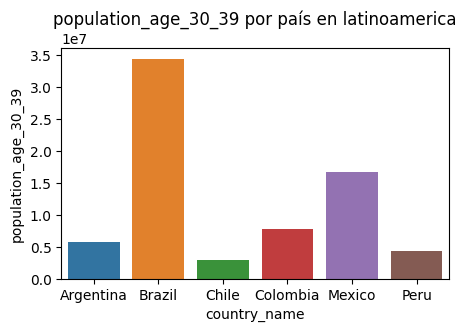

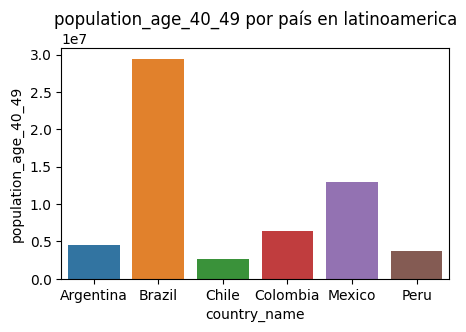

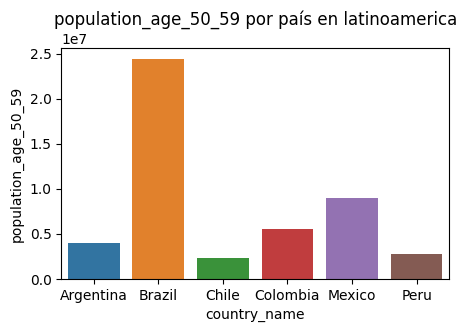

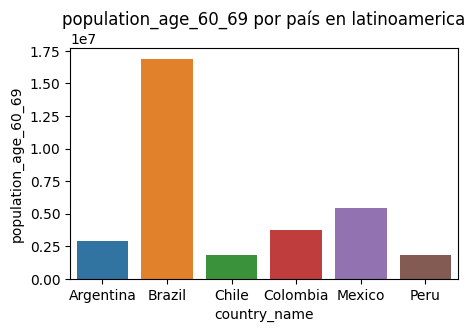

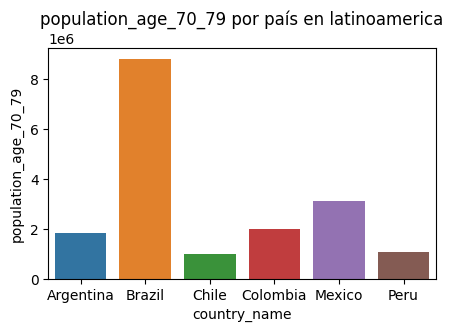

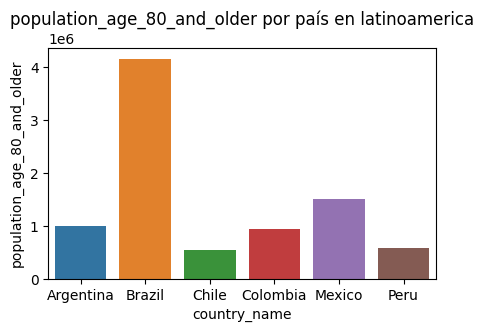

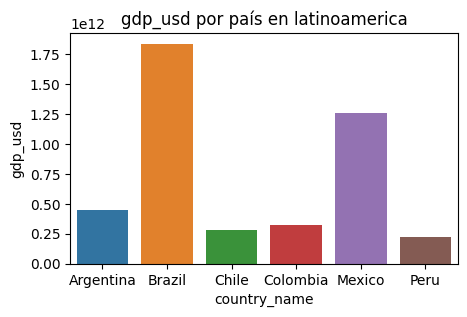

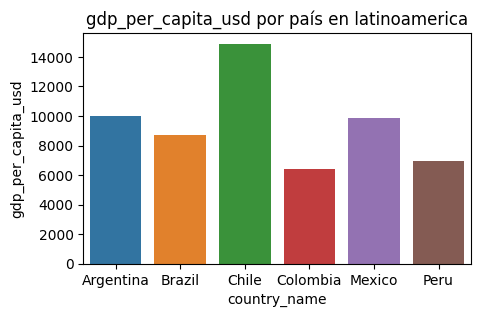

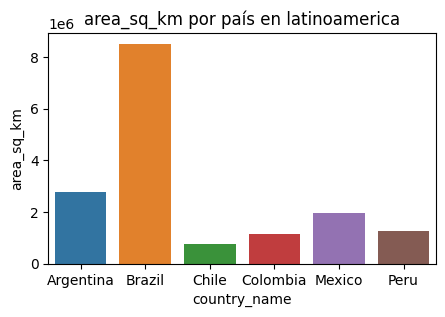

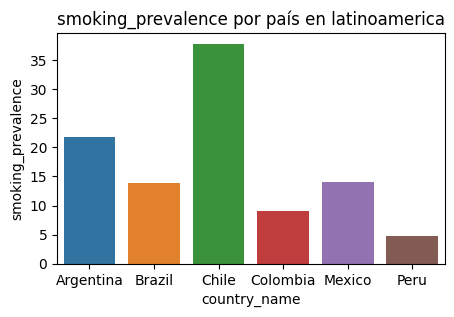

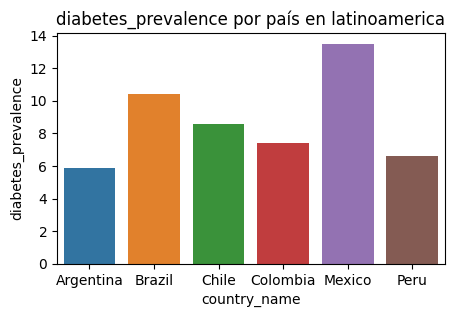

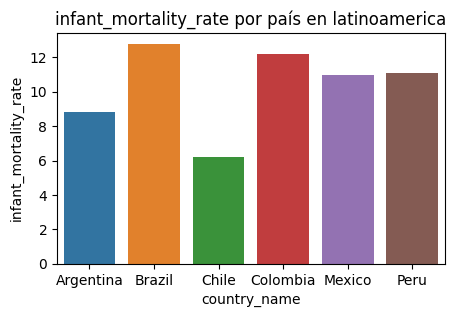

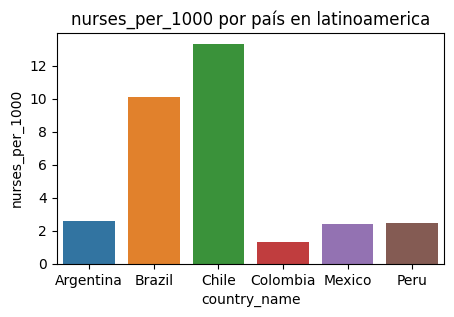

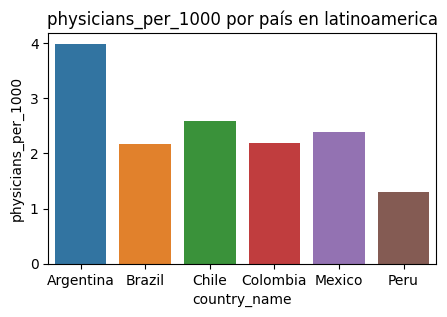

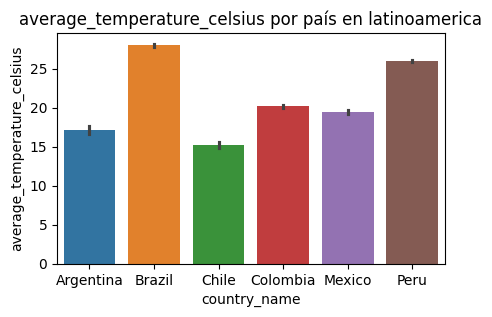

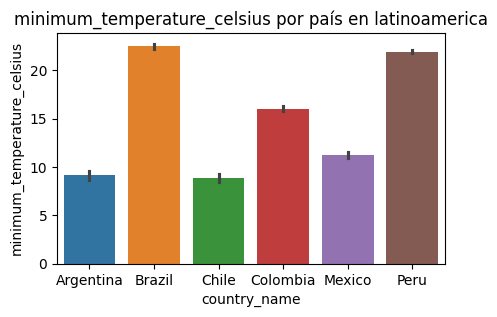

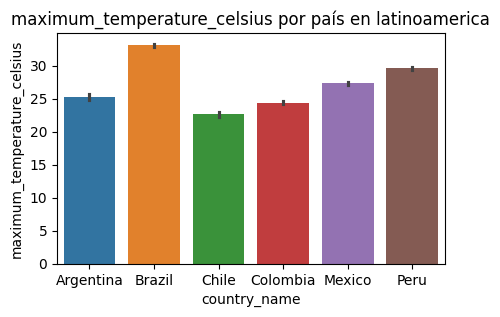

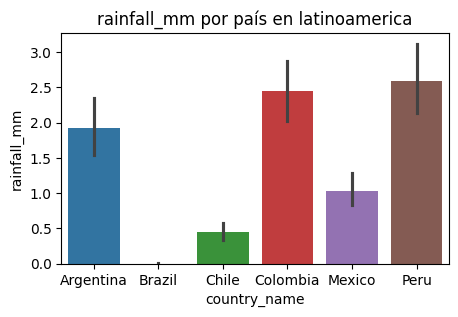

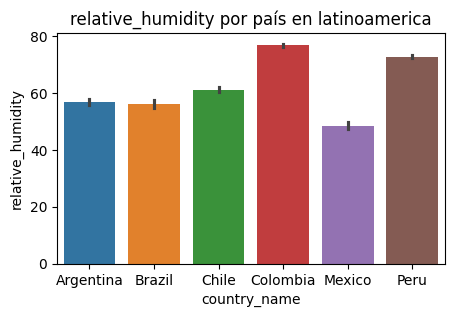

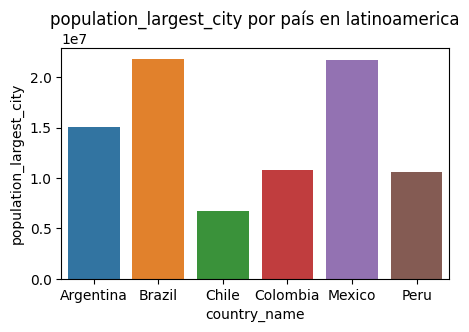

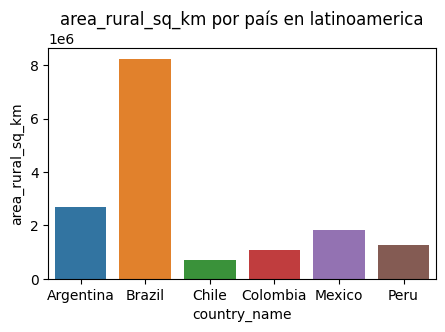

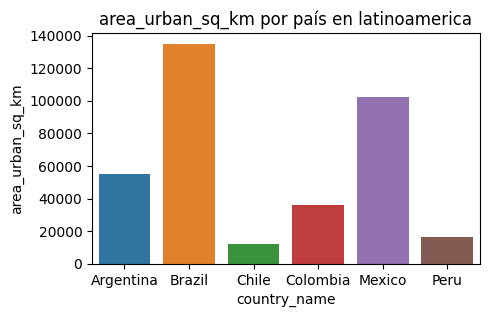

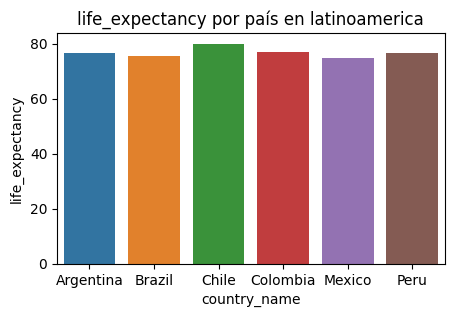

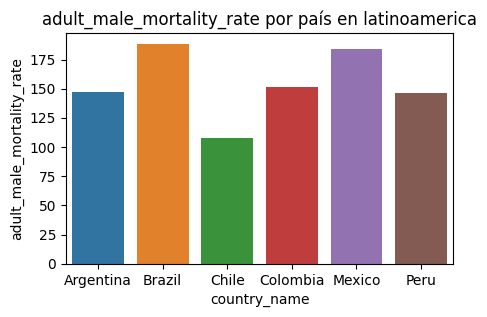

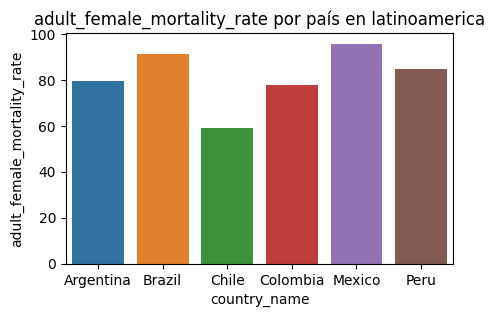

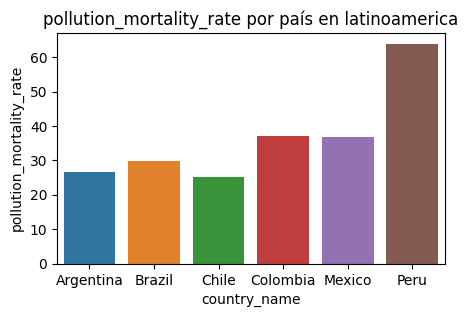

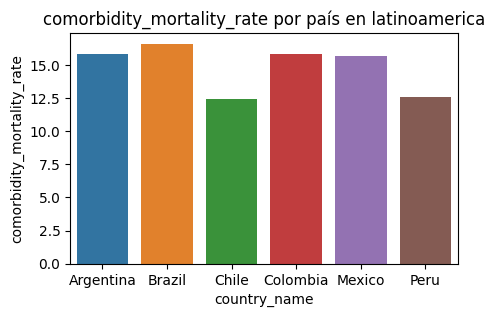

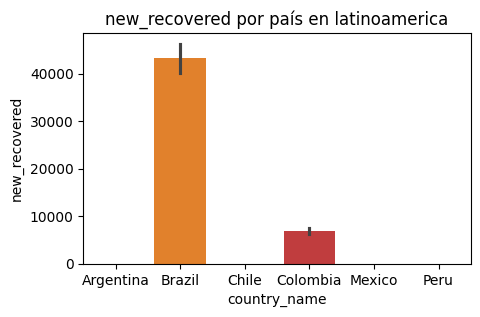

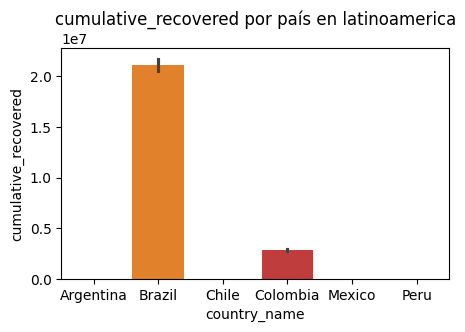

In [ ]:
for i in Data_latinoamerica_nuevo.columns:
    if i not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude']:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x='country_name', y=i, data=Data_latinoamerica_nuevo, ax=ax, hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

In [ ]:
import pandas as pd

# Supongamos que ya tienes tu DataFrame 'data_latinoamerica_paises'
nombres_columnas = Data_latinoamerica_nuevo.columns.tolist()
print(nombres_columnas)

['Unnamed: 0', 'location_key', 'date', 'country_code', 'country_name', 'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'population', 'population_male', 'population_female', 'population_rural', 'population_urban', 'population_density', 'human_development_index', 'population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd', 'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity', 'population_largest_city', 'area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy', 'adult_male_mortality_rate', 'adult_female_

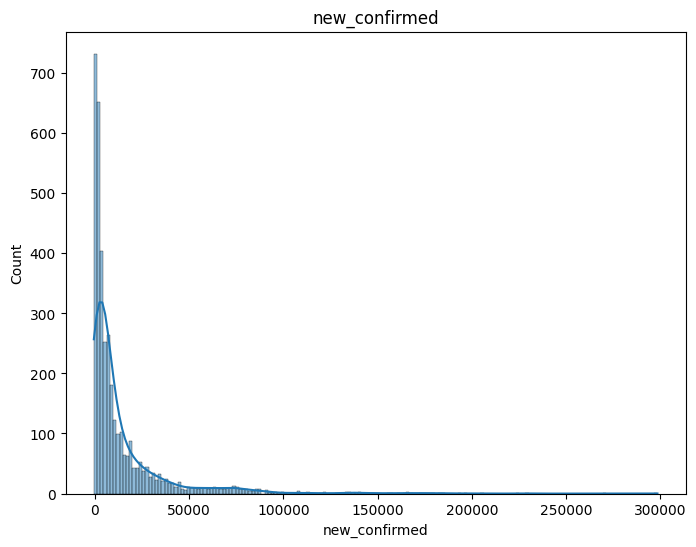

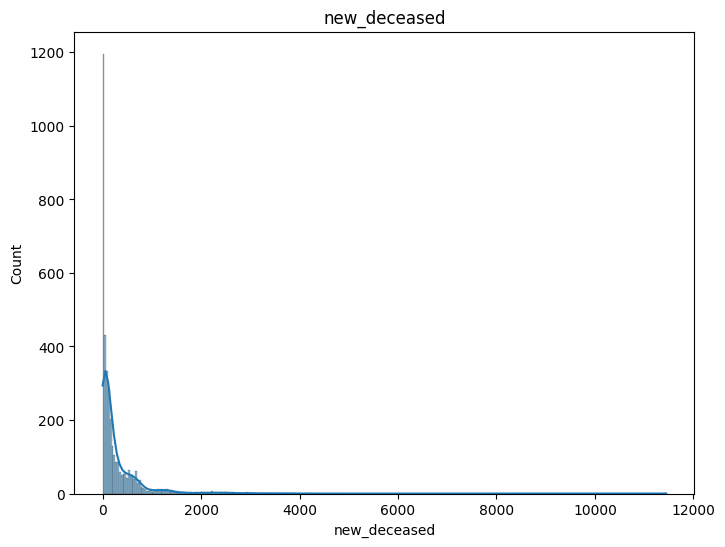

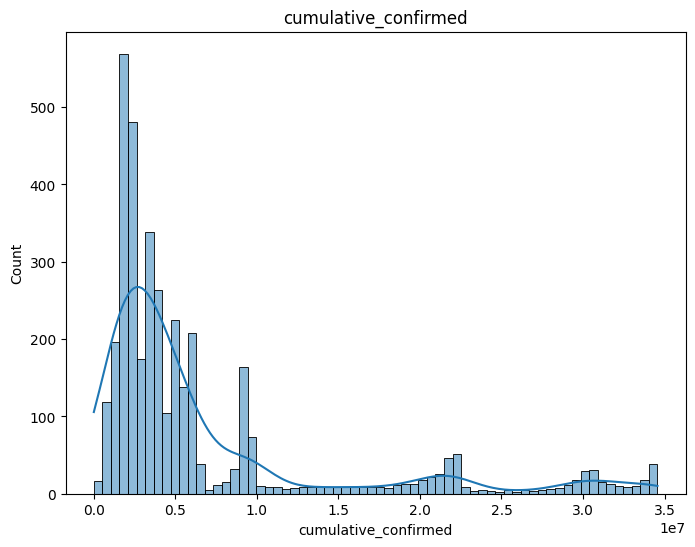

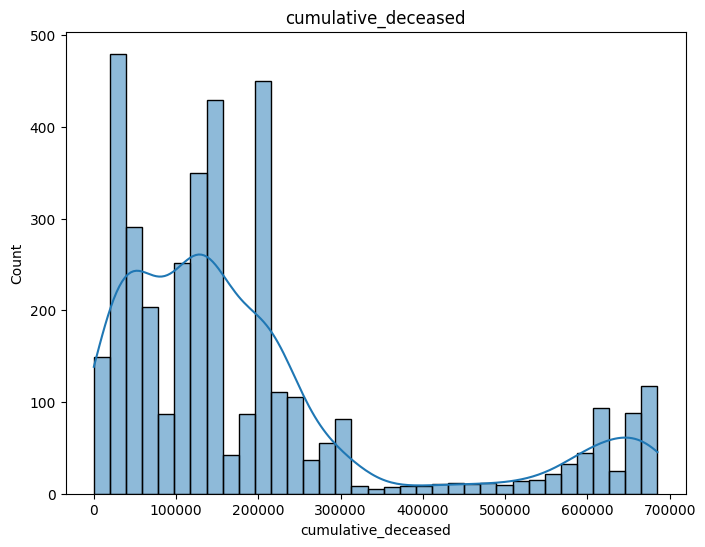

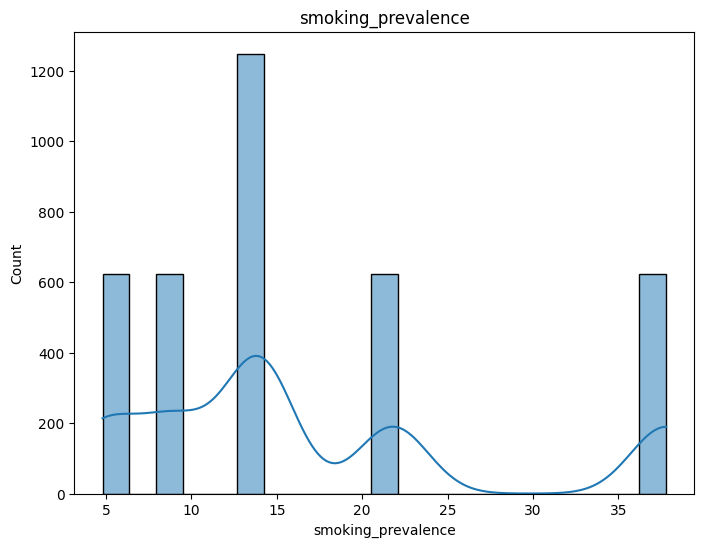

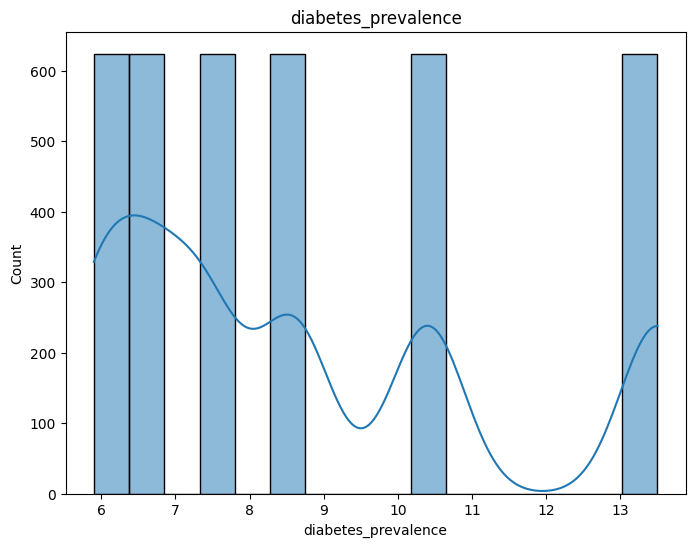

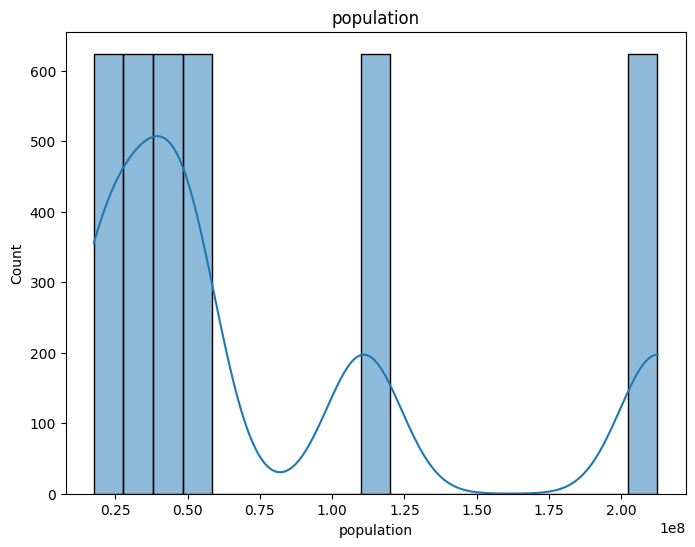

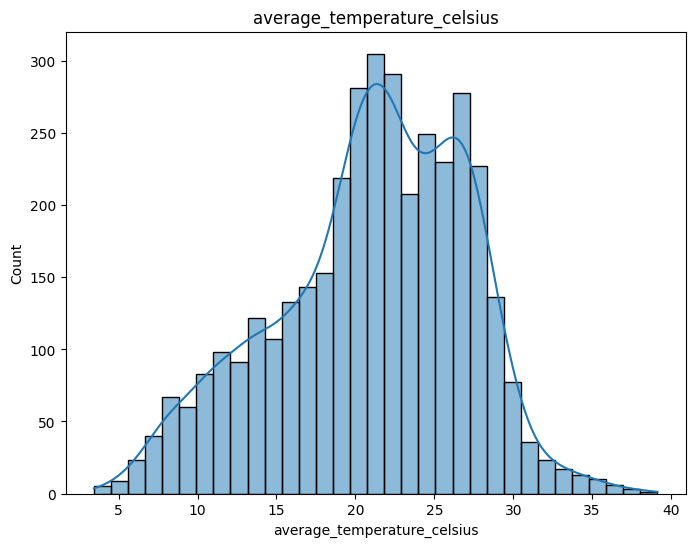

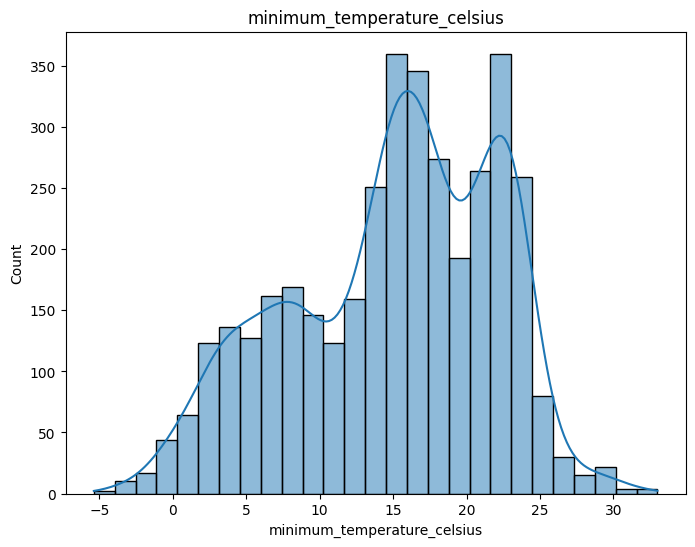

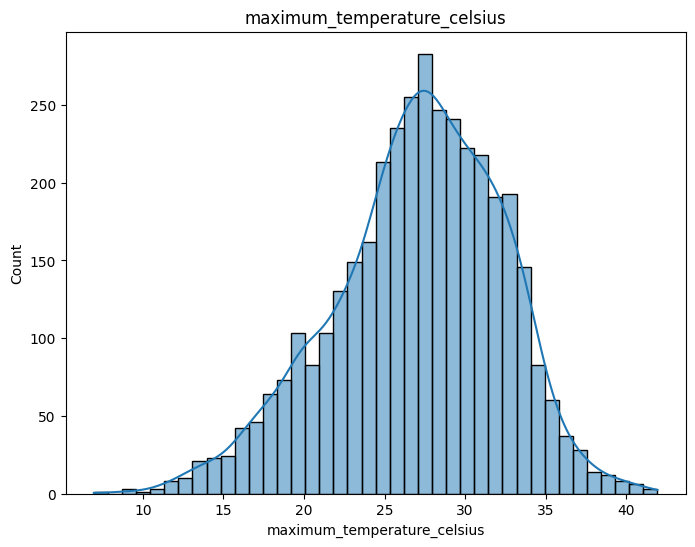

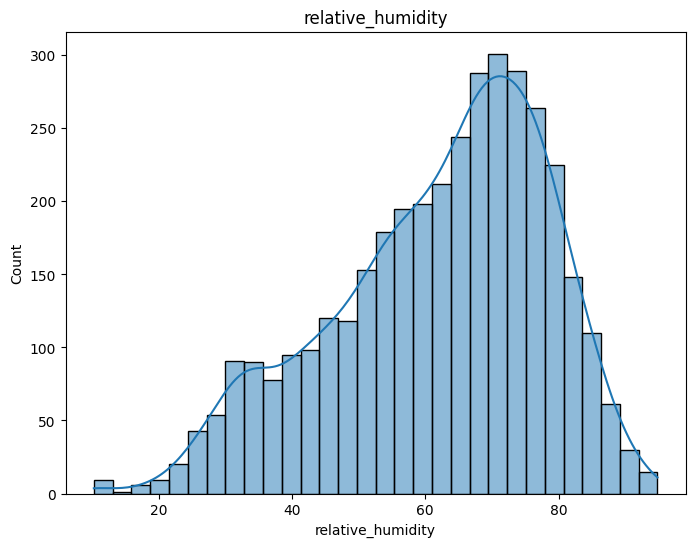

In [ ]:
lista_columnas=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased",
                  "cumulative_vaccine_doses_administered",'smoking_prevalence','diabetes_prevalence','population',"average_temperature_celsius",
                  "minimum_temperature_celsius","maximum_temperature_celsius","relative_humidity"]

# Crear histogramas de las variables numéricas
for i in Data_latinoamerica_nuevo[lista_columnas]:
    if i not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude',
                 'cumulative_recovered', 'cumulative_vaccine_doses_administered']:
        fig, ax = plt.subplots(figsize=(8,6))
        sns.histplot(Data_latinoamerica_nuevo[i], kde=True)
        plt.title(i)
        plt.show()

4.D. Gráficos de dispersión para explorar posibles relaciones entre las variables.
Diagrama de dispersión de la temperatura media contra los casos confirmados.

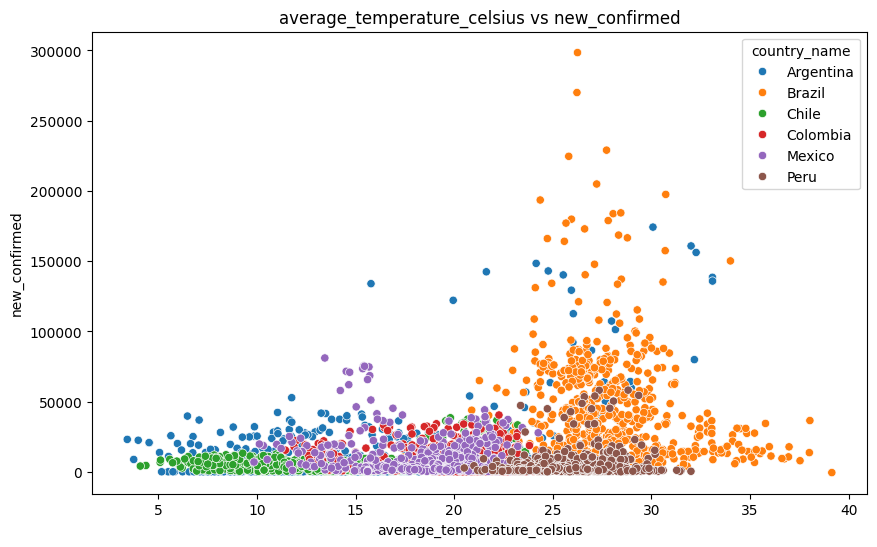

In [ ]:
# Gráfica de average_temperature_celsius vs new_confirmed
plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=Data_latinoamerica_nuevo, hue='country_name')
plt.title('average_temperature_celsius vs new_confirmed')
plt.show()

Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

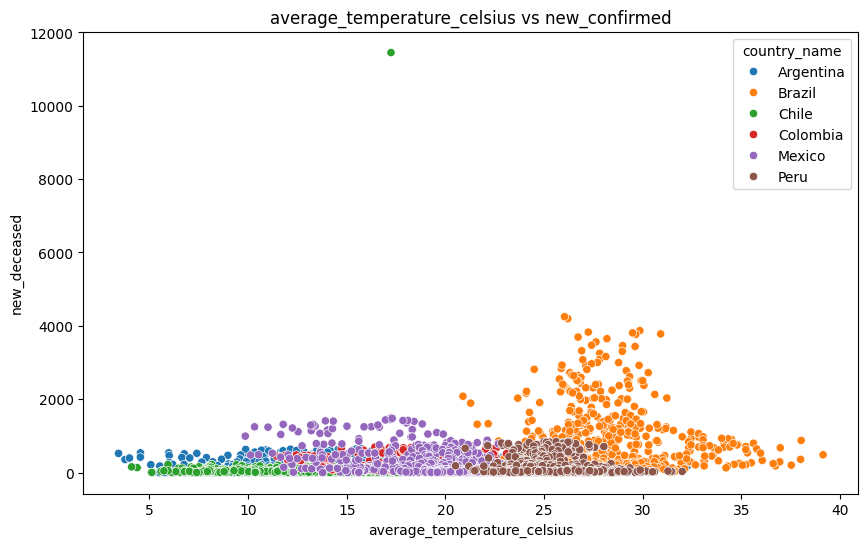

In [ ]:
# Gráfica de average_temperature_celsius vs new_deceased
plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=Data_latinoamerica_nuevo, hue='country_name')
plt.title('average_temperature_celsius vs new_confirmed')
plt.show()

Comportamiento de las dosis administradas de todos los países (Valor medio).

In [ ]:
# Establecer la columna de fecha como índice
Data_latinoamerica_nuevo.set_index('date', inplace=True)

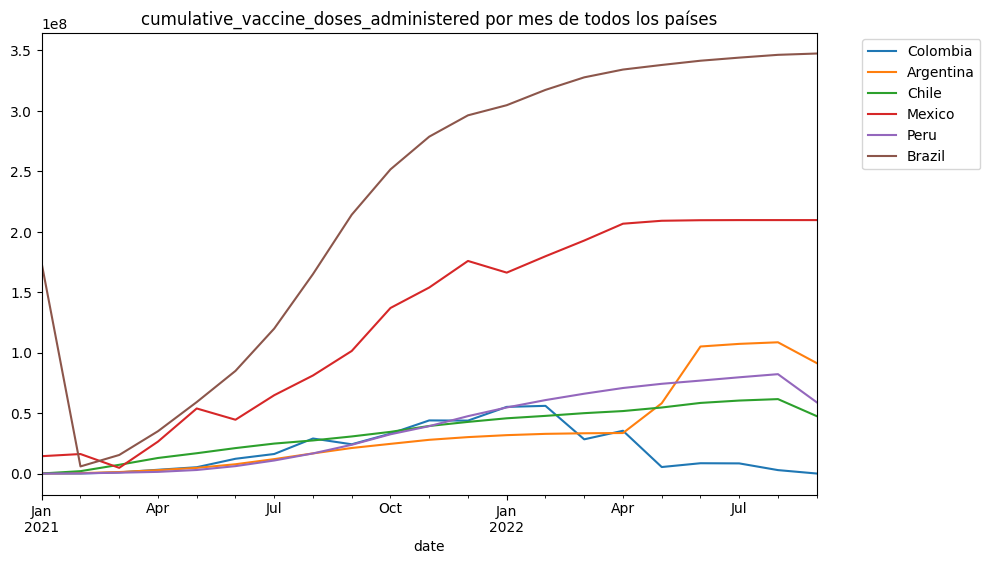

In [ ]:
# Gráfica de valores medios de todos los países cumulative_vaccine_doses_administered
#creo una lista con los paises seleccionados:
Paises_seleccionados = ["Colombia", "Argentina", "Chile", "Mexico", "Peru" , "Brazil"]

fig, ax = plt.subplots(figsize=(10, 6))
for pais in Paises_seleccionados:
    Data_latinoamerica_nuevo[Data_latinoamerica_nuevo["country_name"] == pais].resample("ME").mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot(ax=ax, label=pais)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes de todos los países')
plt.show()


Evolución de dosis administradas por mes de cada país.

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

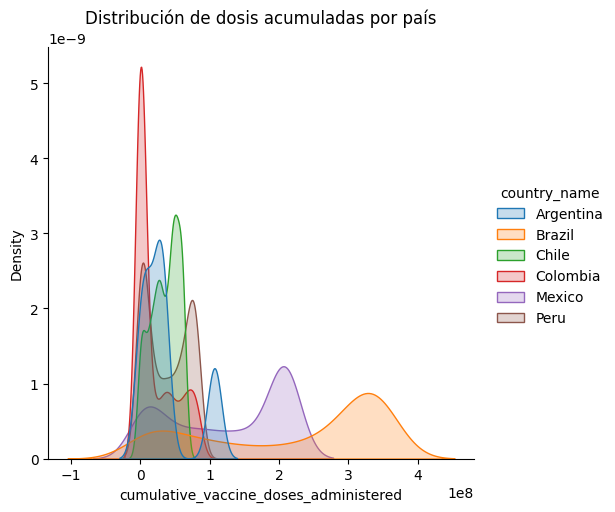

In [ ]:
sns.displot(Data_latinoamerica_nuevo, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')

Muertes por mes de cada país.

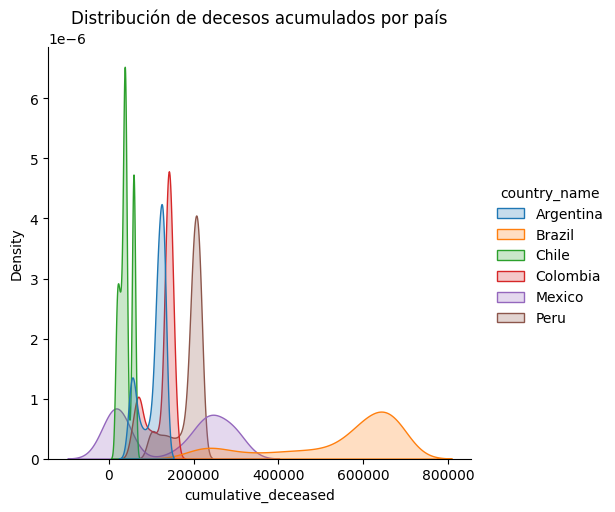

In [ ]:
# Gráfica de muertes de todos los países

sns.displot(Data_latinoamerica_nuevo, x="cumulative_deceased", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de decesos acumulados por país')

plt.show()

Casos confirmados por mes de cada país.

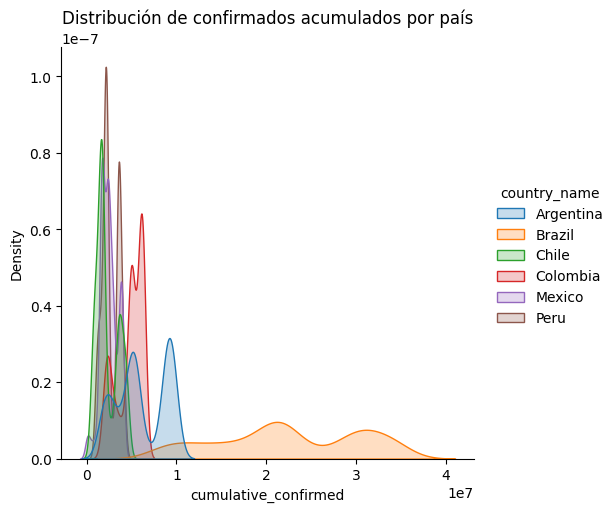

In [ ]:
# Gráfica de casos confirmados de todos los países

sns.displot(Data_latinoamerica_nuevo, x="cumulative_confirmed", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de confirmados acumulados por país')

plt.show()

Recuperaciones de casos por mes de cada país.

In [ ]:
# Verificar si hay índices duplicados
Data_latinoamerica_nuevo = Data_latinoamerica_nuevo.reset_index(drop=True)
print(Data_latinoamerica_nuevo.index.duplicated().sum())


0


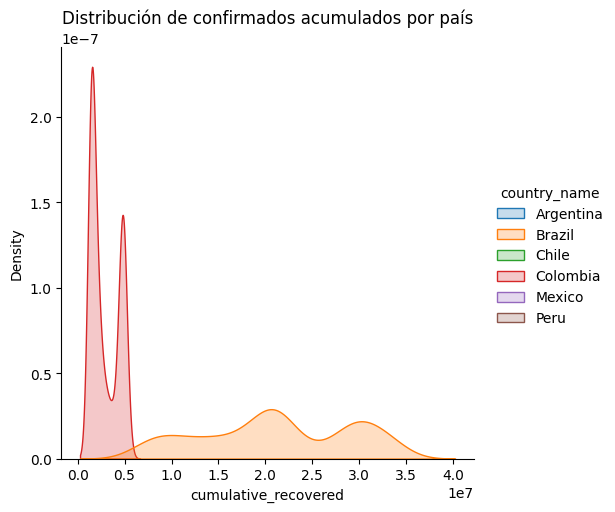

In [ ]:
# Gráfica de casos confirmados de todos los países
sns.displot(Data_latinoamerica_nuevo, x="cumulative_recovered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de confirmados acumulados por país')

plt.show()

Boxplot de temperatura media de cada país.

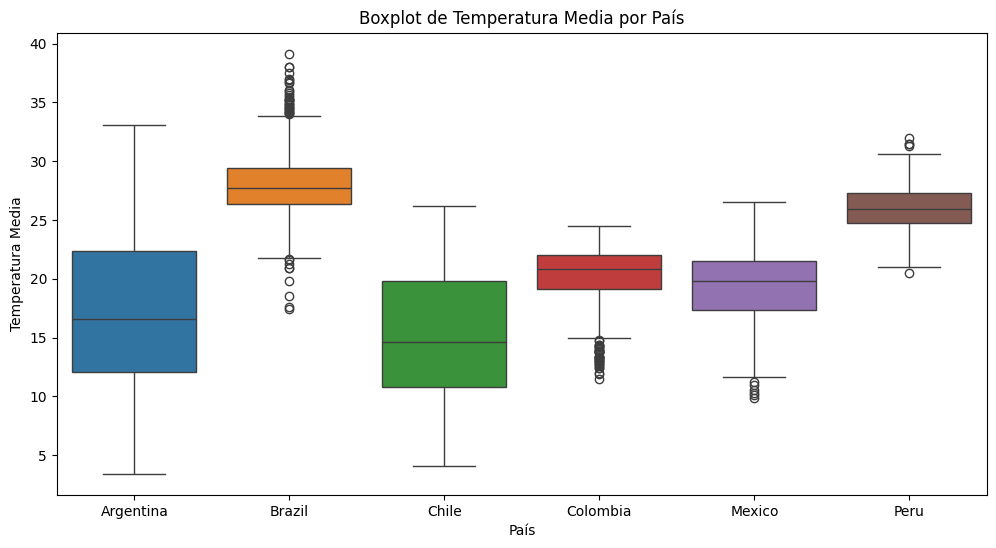

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=Data_latinoamerica_nuevo, hue='country_name')

plt.title('Boxplot de Temperatura Media por País')
plt.xlabel('País')
plt.ylabel('Temperatura Media')

plt.show()

Violinplot de las variables que “Sí” tenga cambios de valores.

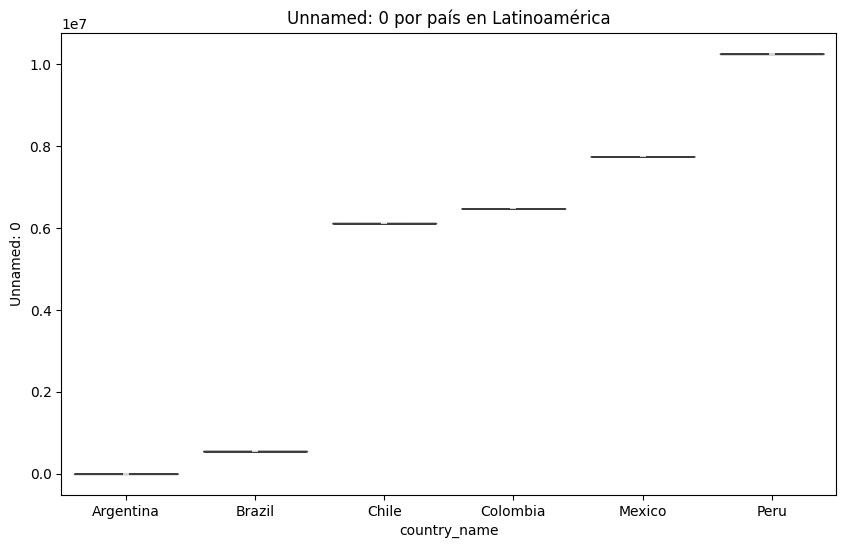

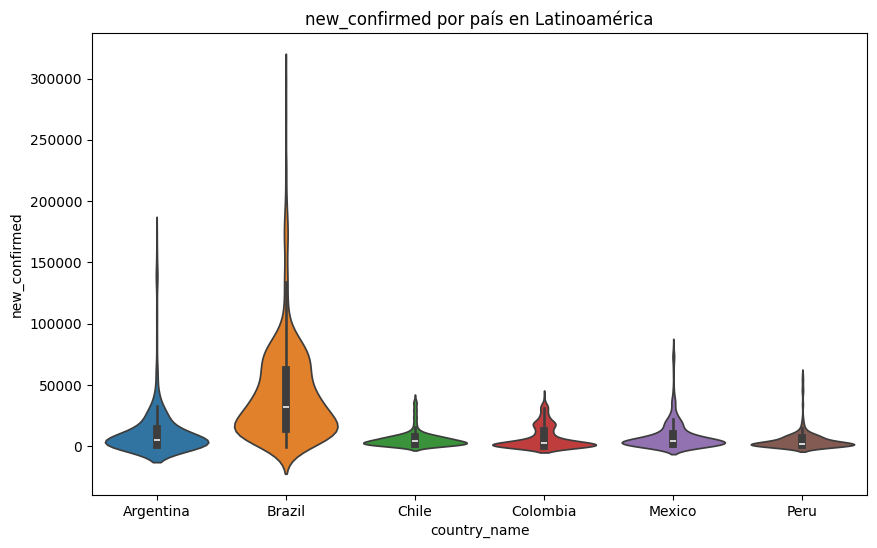

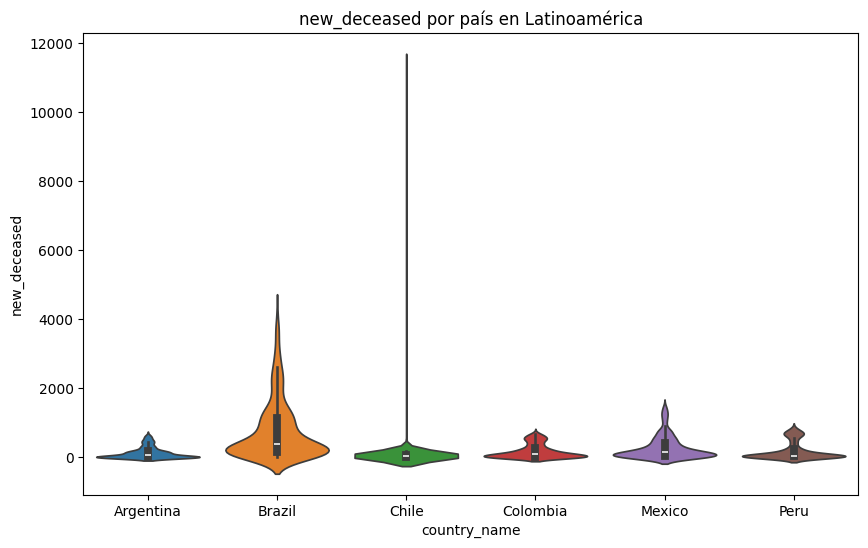

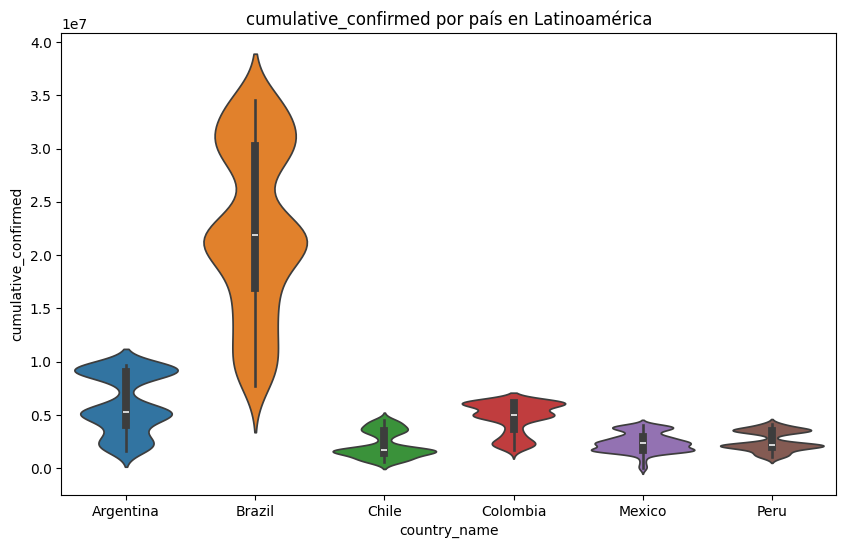

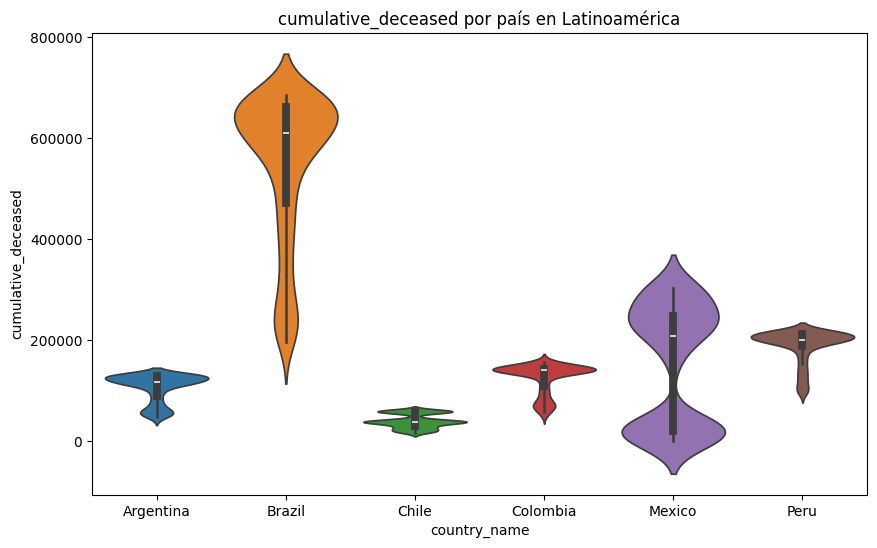

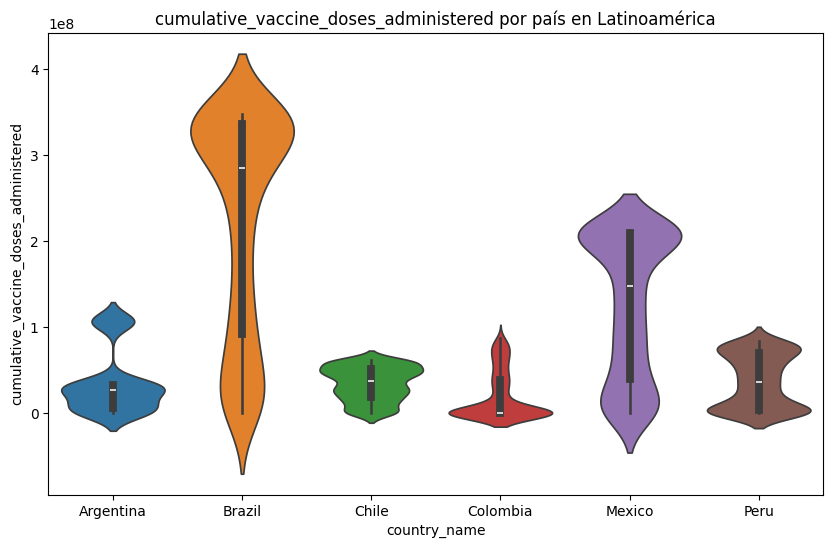

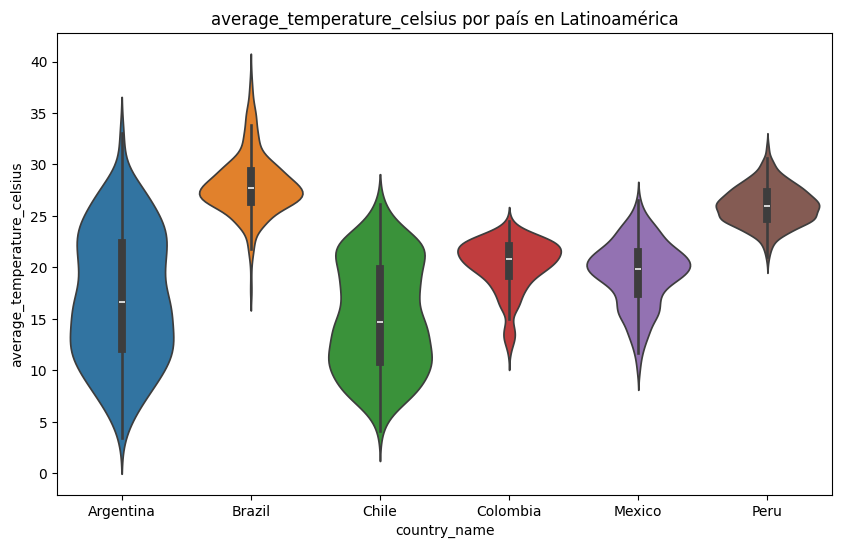

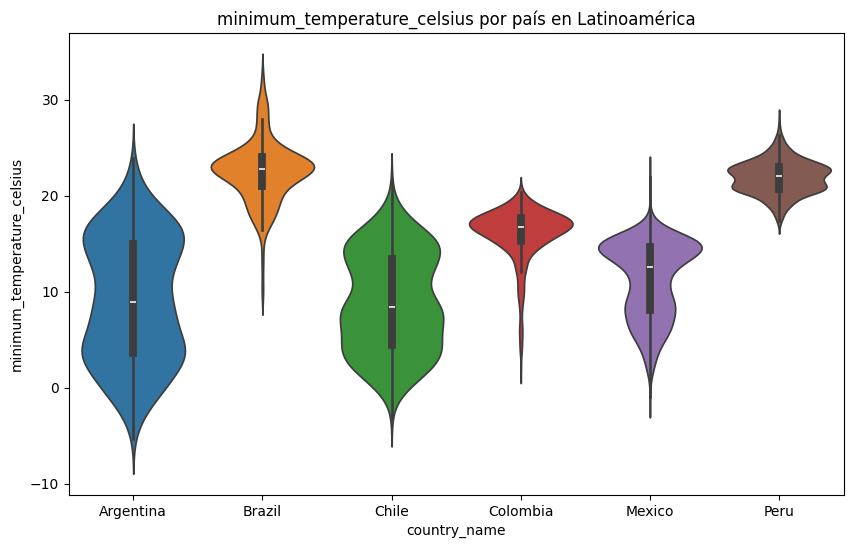

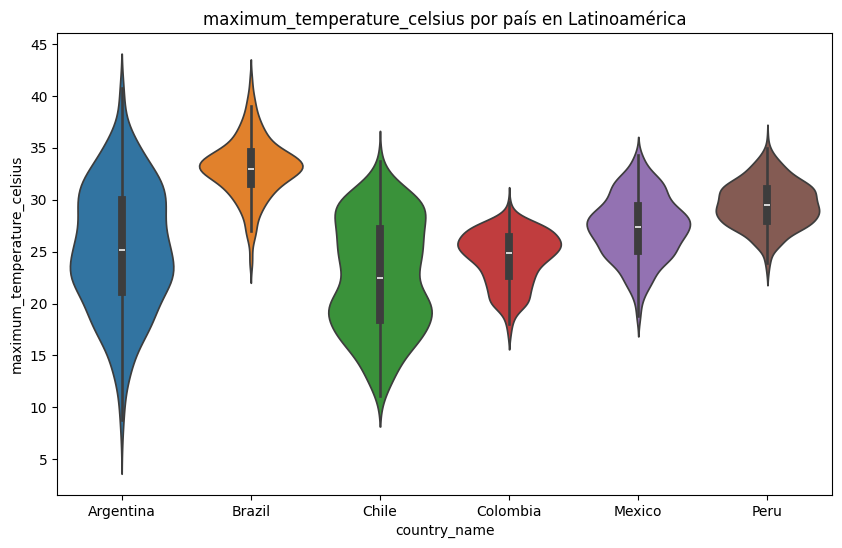

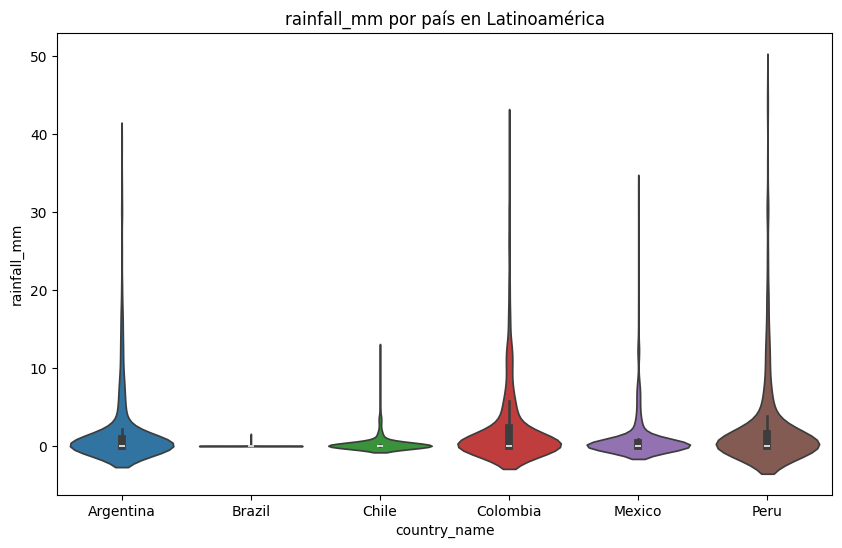

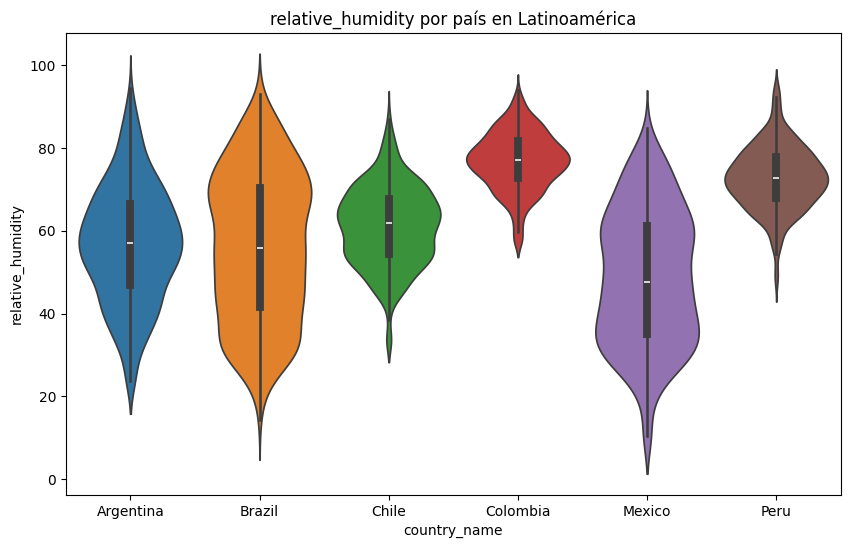

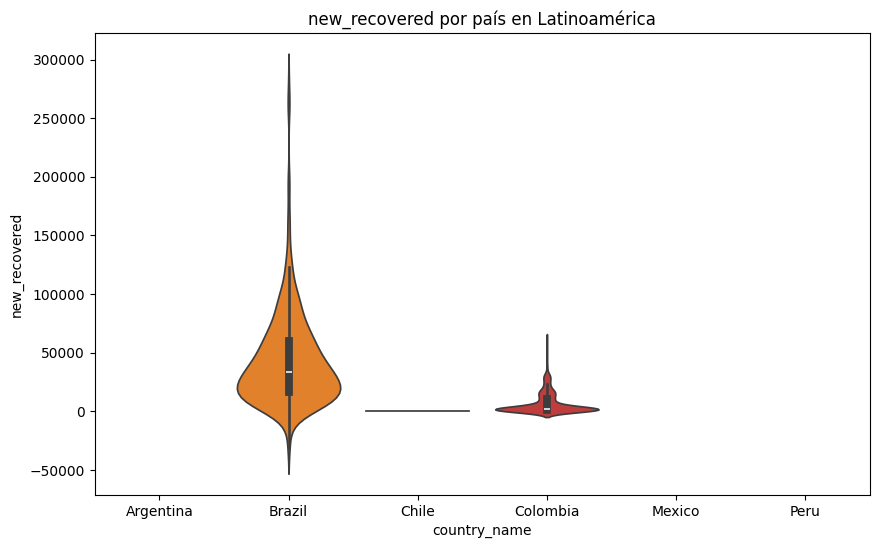

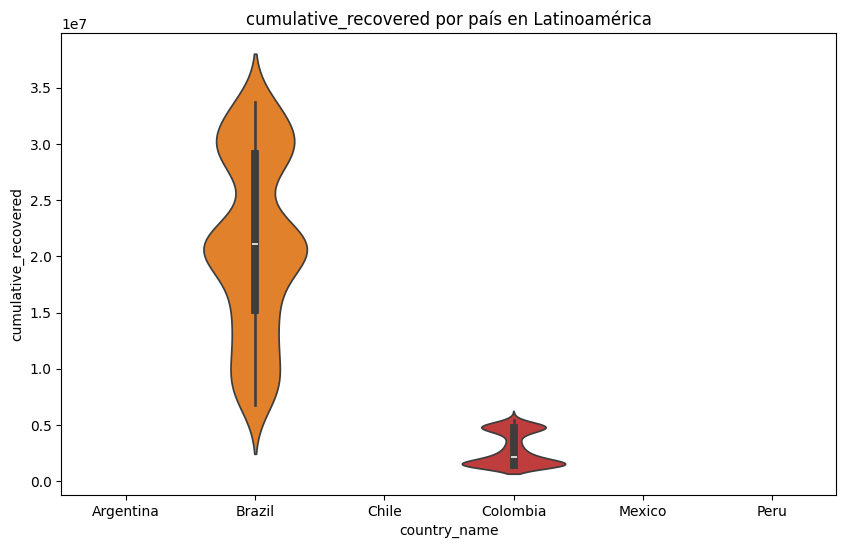

In [ ]:
#Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes 

columnas_mayores_6=[]
for i in Data_latinoamerica_nuevo.columns:
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude']:
        if Data_latinoamerica_nuevo[i].nunique()>6:
            columnas_mayores_6.append(i)
        
#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por pais.

columnas_mayores_6.append('country_name')

#Se crea un dataframe con las columnas mayores a 6

data_latinoamerica_paises_mayores_6=Data_latinoamerica_nuevo [columnas_mayores_6]

#violinplot en todos los paises para variables numericas

for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude', 'country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6, hue='country_name')
        plt.title(f"{i} por país en Latinoamérica")
        plt.show()

Distribución de la población por grupos de edad.

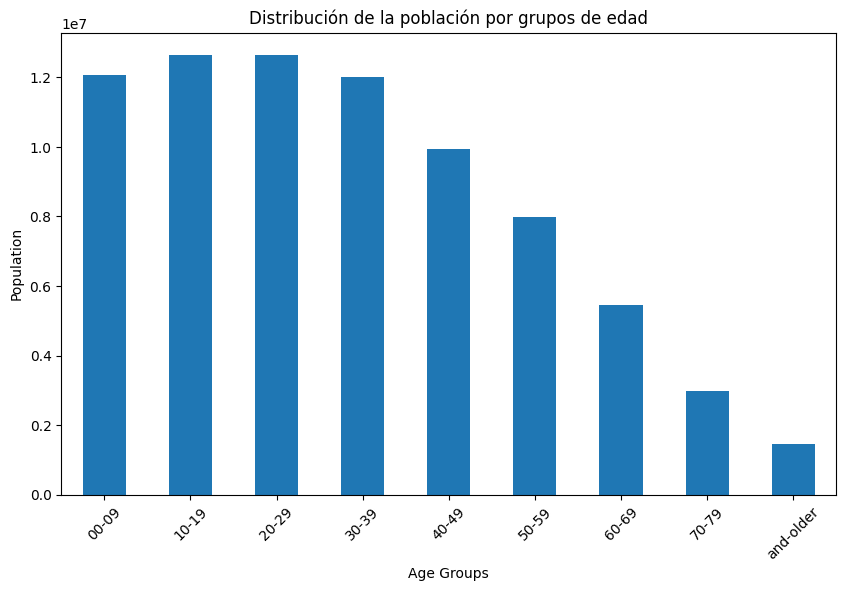

In [ ]:
# Calculamos la distribucion de la poblacion por grupos de edad
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = Data_latinoamerica_nuevo [age_columns].mean()


plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_') [-2] + '-' + col.split('_') [-1] for col in age_columns], rotation=45)
plt.show()

Mapa de calor de Métricas por país.

Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

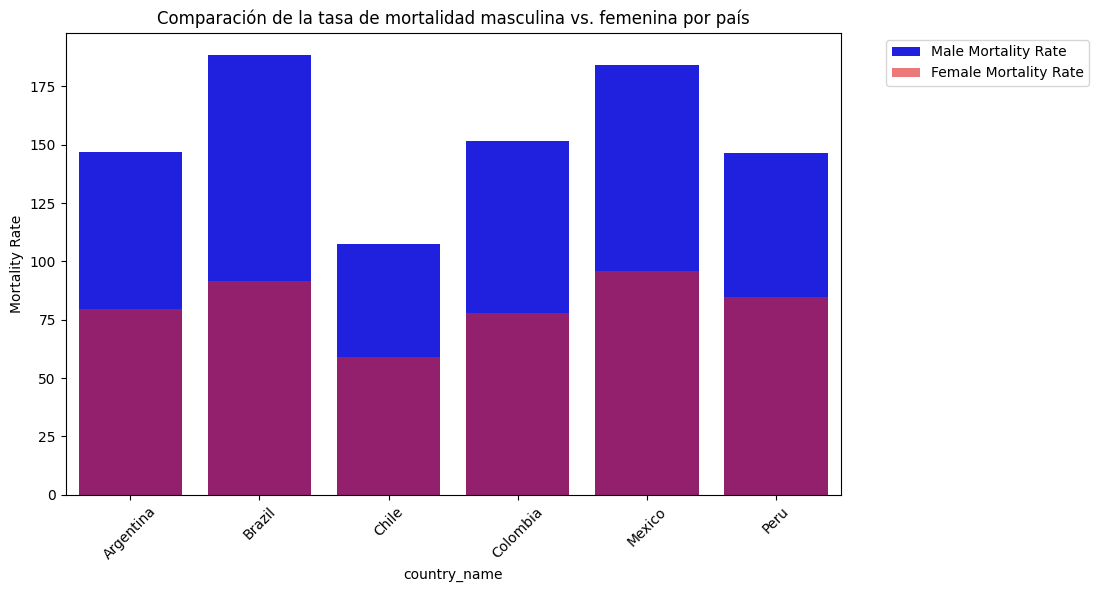

In [ ]:
#grafica de mortalidad por genero
plt.figure(figsize=(10, 6))
sns.barplot(data=Data_latinoamerica_nuevo, x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=Data_latinoamerica_nuevo, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend (bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Matriz de correlación de indicadores demográficos y de salud.

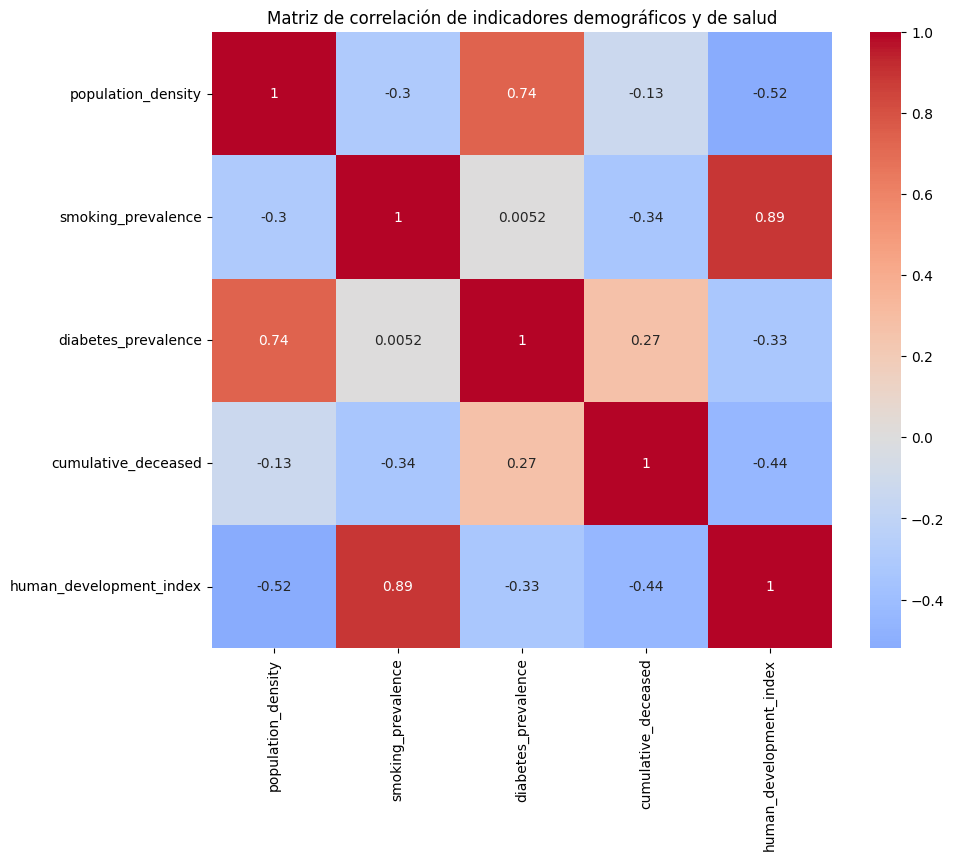

In [ ]:
#Selecting a subset of columns for correlation análisis
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = Data_latinoamerica_nuevo [columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()



Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

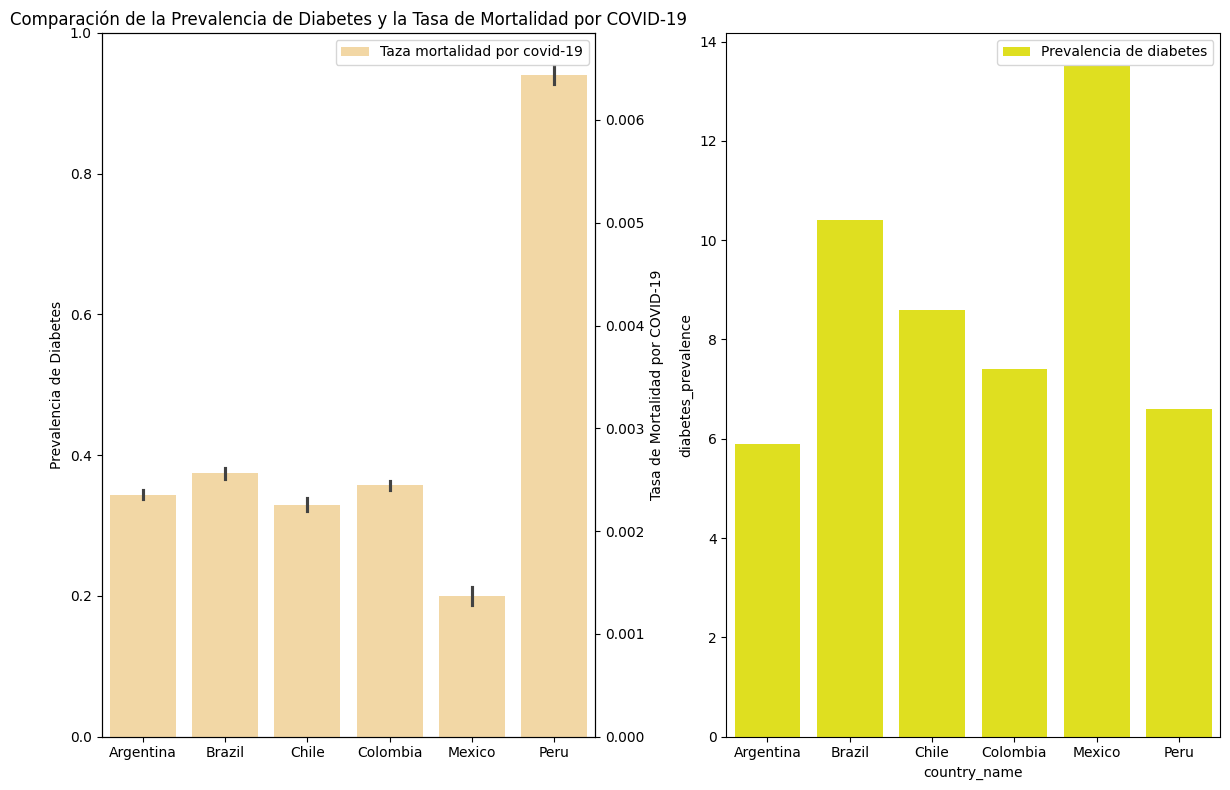

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(data=Data_latinoamerica_nuevo, x= Data_latinoamerica_nuevo ['country_name'], y= Data_latinoamerica_nuevo ['diabetes_prevalence'], color='yellow', label ="Prevalencia de diabetes")
ax2 = ax.twinx()
sns.barplot(data=Data_latinoamerica_nuevo, x= Data_latinoamerica_nuevo ['country_name'], y= Data_latinoamerica_nuevo ['cumulative_deceased'] / Data_latinoamerica_nuevo["population"], color="orange", label ="Taza mortalidad por covid-19", ax = ax2,
            alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

# AVANCE 3 Biogenesys

In [ ]:
#Importo las librerias
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os

In [ ]:
#Se abre el dataset que se va a utilizar 
Data_latinoamerica_AVANCE3 = pd.read_csv ("datosfiltradosprimeraparte.csv",sep= ",")

In [ ]:
#se vuelve a ver la cantidad de datos, para ver si funcionó la mascara
np.shape (Data_latinoamerica_AVANCE3)

(3744, 51)

In [ ]:
#Se hace la columna date tipo de dato fecha
Data_latinoamerica_AVANCE3['date'] = pd.to_datetime(Data_latinoamerica_AVANCE3['date'], format='%Y-%m-%d')  # Ajusta el formato según sea necesario

In [ ]:
#Se hace la olumna date indice
Data_latinoamerica_AVANCE3.set_index('date', inplace=True)

In [ ]:
#Se cambia el tipo de dato de la columna fechas y se hace como indice a la columna date

Data_latinoamerica_AVANCE3.index = pd.to_datetime(Data_latinoamerica_AVANCE3.index)

Data_latinoamerica_AVANCE3 = pd.DataFrame(data)
Data_latinoamerica_AVANCE3.set_index('date', inplace=True)

Evolución Semanal de Casos Nuevos, Evolución Anual de Casos Nuevos


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in Paises_seleccionados:
    Data_latinoamerica_AVANCE3 [Data_latinoamerica_AVANCE3['country_name']==pais].resample('ME').mean(numeric_only=True) ['new_confirmed'].plot()
plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(Paises_seleccionados)
plt.show()


AttributeError: module 'matplotlib' has no attribute 'subplots'

Progreso de la vacunación por país

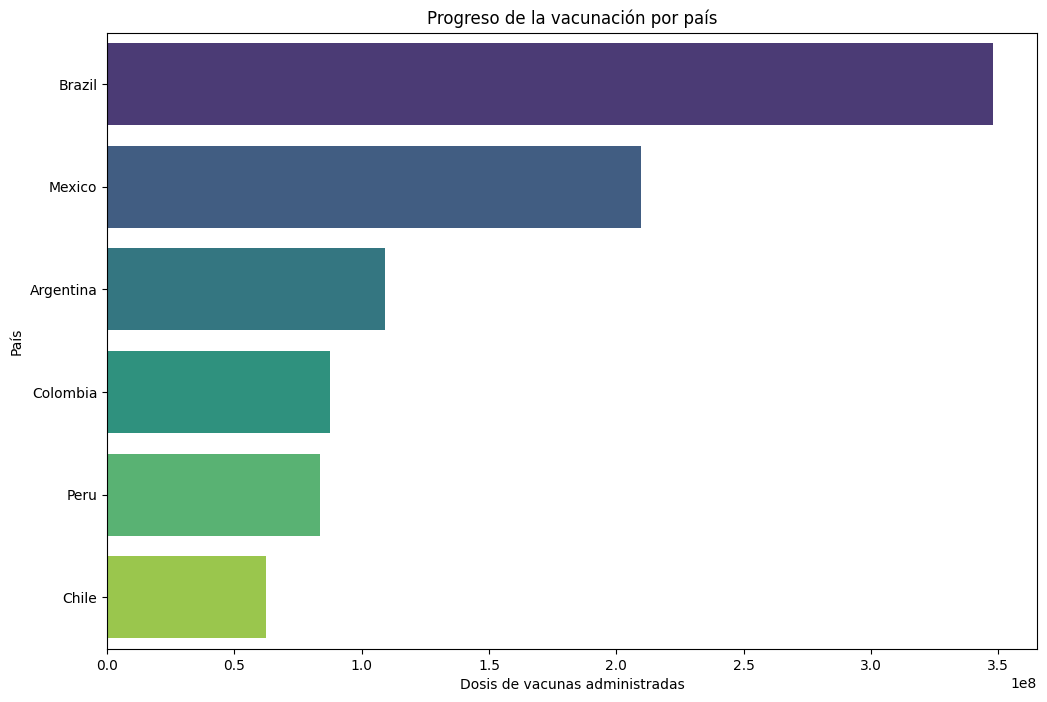

In [ ]:
# Filtrar el DataFrame por los países seleccionados
Data_latinoamerica_filtrado = Data_latinoamerica_AVANCE3[Data_latinoamerica_AVANCE3['country_name'].isin(Paises_seleccionados)]

# Agrupar y ordenar los datos de vacunación
vaccination_data = Data_latinoamerica_filtrado.groupby('country_name')["cumulative_vaccine_doses_administered"].max().sort_values(ascending=False)

# Crear el DataFrame para el gráfico
vaccination_df = vaccination_data.reset_index()

# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_df['cumulative_vaccine_doses_administered'], y=vaccination_df['country_name'], hue=vaccination_df['country_name'], palette='viridis', dodge=False, legend=False)
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')
plt.show()

Nuevos casos y temperatura promedio

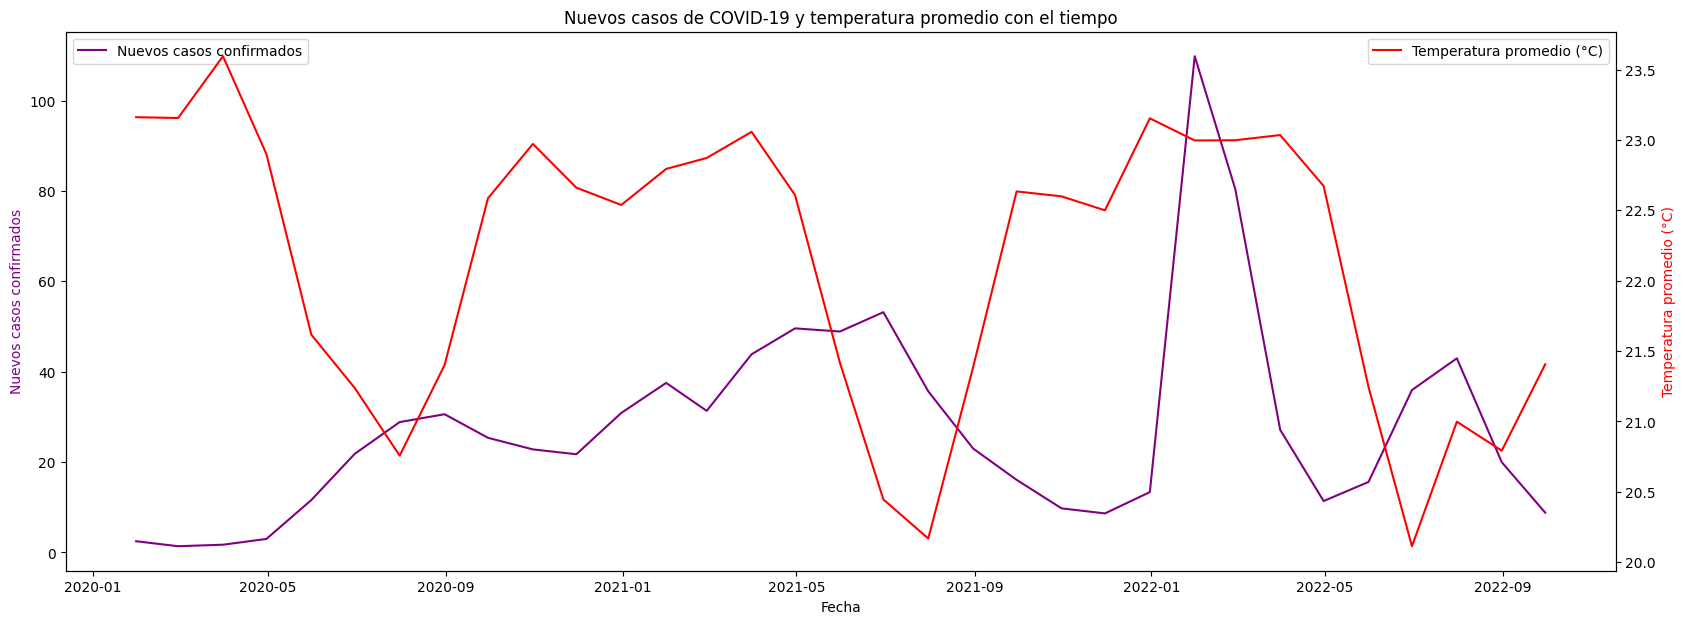

In [ ]:
resampled_data = Data_latinoamerica_AVANCE3.resample('ME').mean(numeric_only=True)

# Graficar la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19
plt.figure(figsize=(20, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Usar la variable resampled_data en lugar de llamar resample() varias veces
ax1.plot(resampled_data.index, resampled_data['new_confirmed'], color="purple", label="Nuevos casos confirmados")
ax2.plot(resampled_data.index, resampled_data['average_temperature_celsius'], color="red", label="Temperatura promedio (°C)")

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='purple')
ax2.set_ylabel('Temperatura promedio (°C)', color='red')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Distribución de la Población por Edad en Países

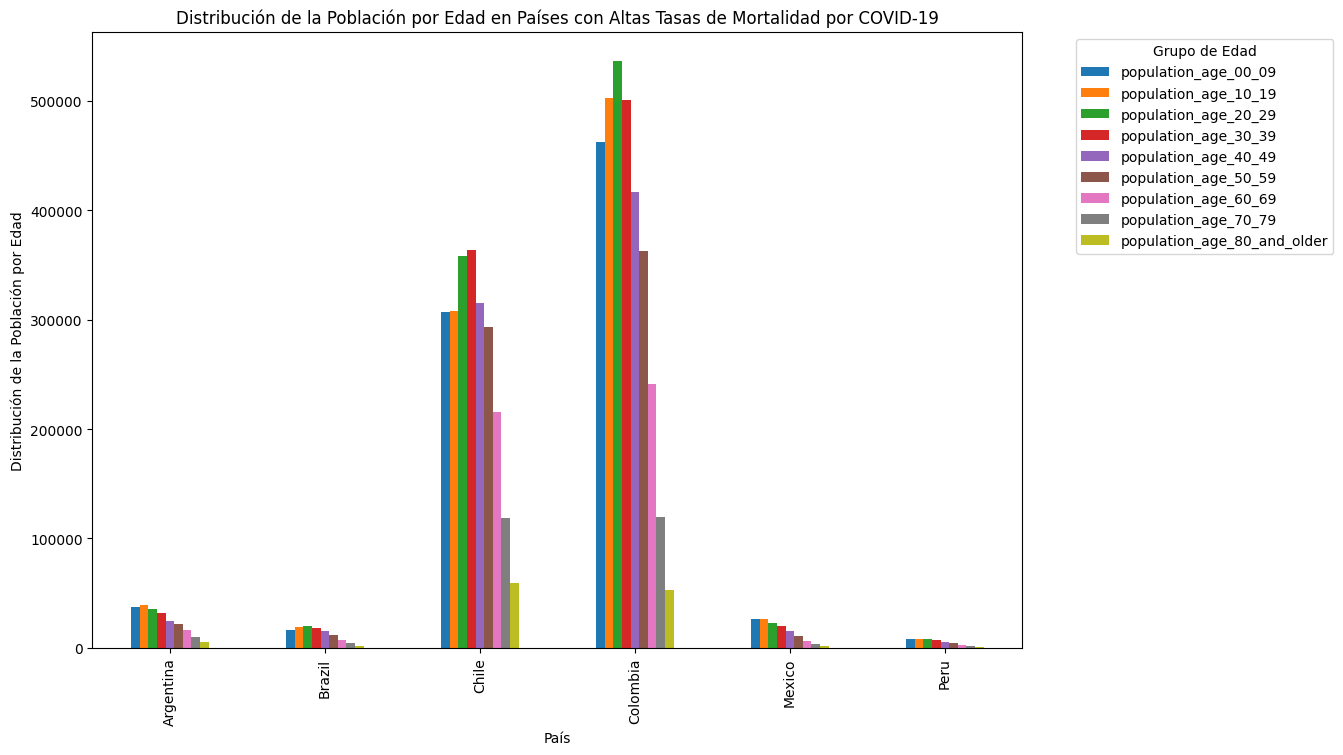

In [ ]:
high_mortality_countries = Data_latinoamerica_AVANCE3.groupby('country_name') ['cumulative_deceased'].max().sort_values(ascending=False).head(6).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = Data_latinoamerica_AVANCE3 [Data_latinoamerica_AVANCE3 ['country_name'].isin(high_mortality_countries)].groupby('country_name') [age_groups].mean()
age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('País')
plt.ylabel('Distribución de la Población por Edad')
plt.title('Distribución de la Población por Edad en Países con Altas Tasas de Mortalidad por COVID-19')
plt.legend (bbox_to_anchor=(1.05, 1), loc='upper left', title='Grupo de Edad')
plt.show()

Comparación de Estrategias de Vacunación en América Latina



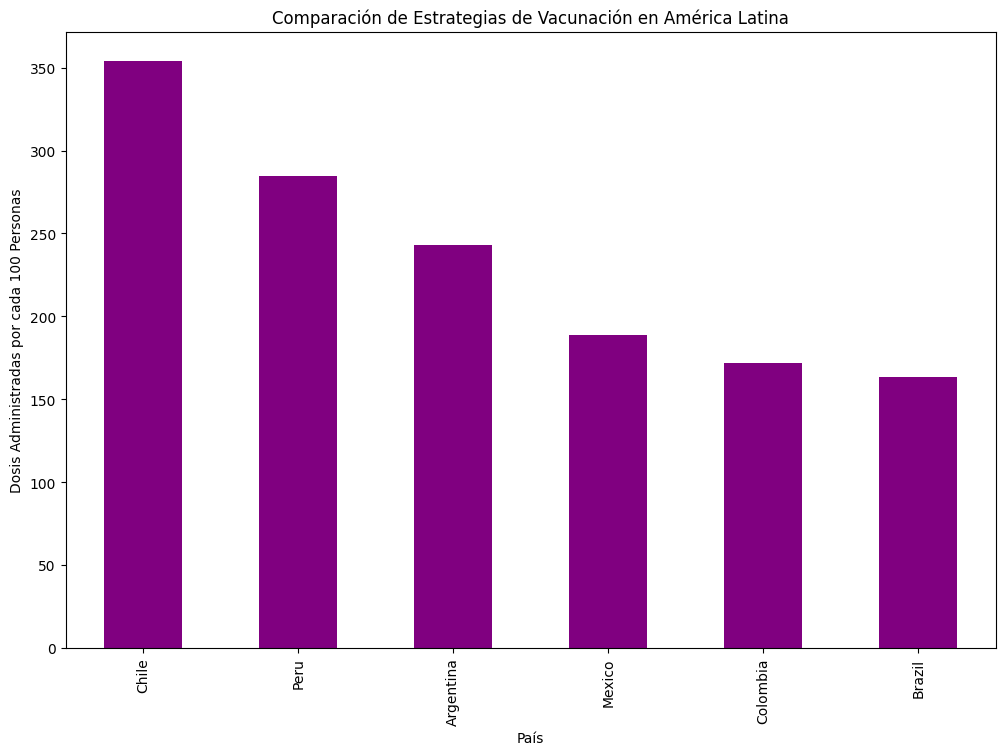

In [ ]:
vaccination_strategy = Data_latinoamerica_AVANCE3.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / Data_latinoamerica_AVANCE3.groupby ("country_name")["population"]. max() *100
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color = 'purple')
plt.xlabel('País')
plt.ylabel('Dosis Administradas por cada 100 Personas')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

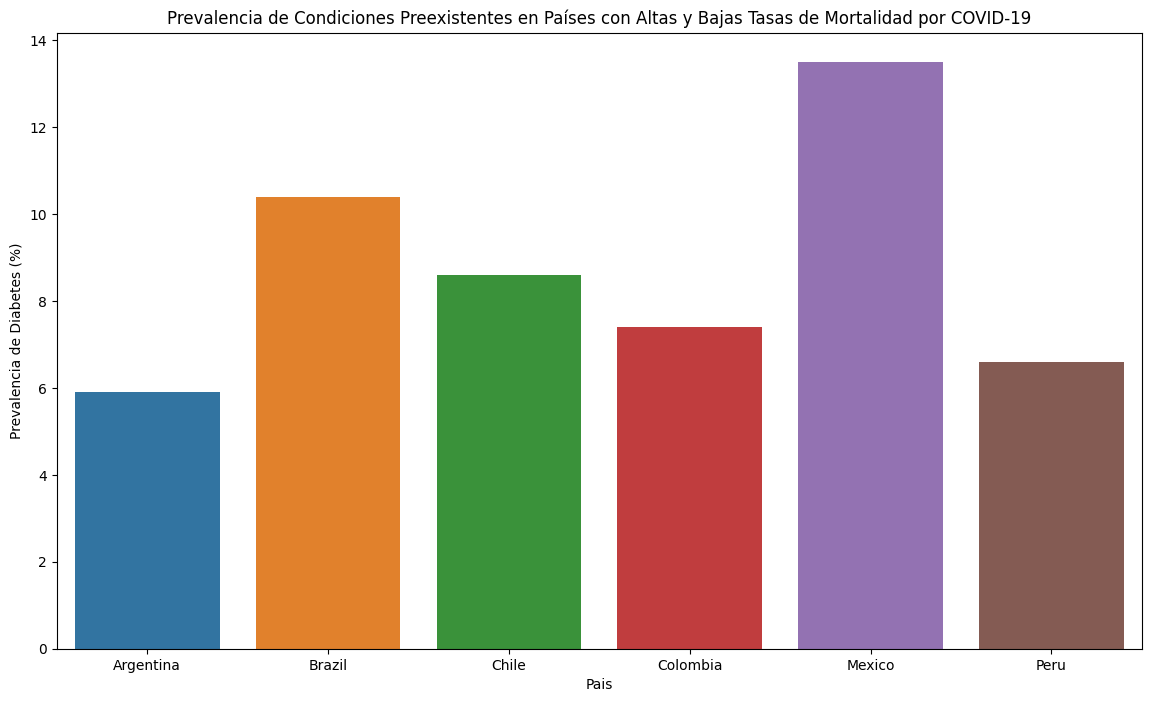

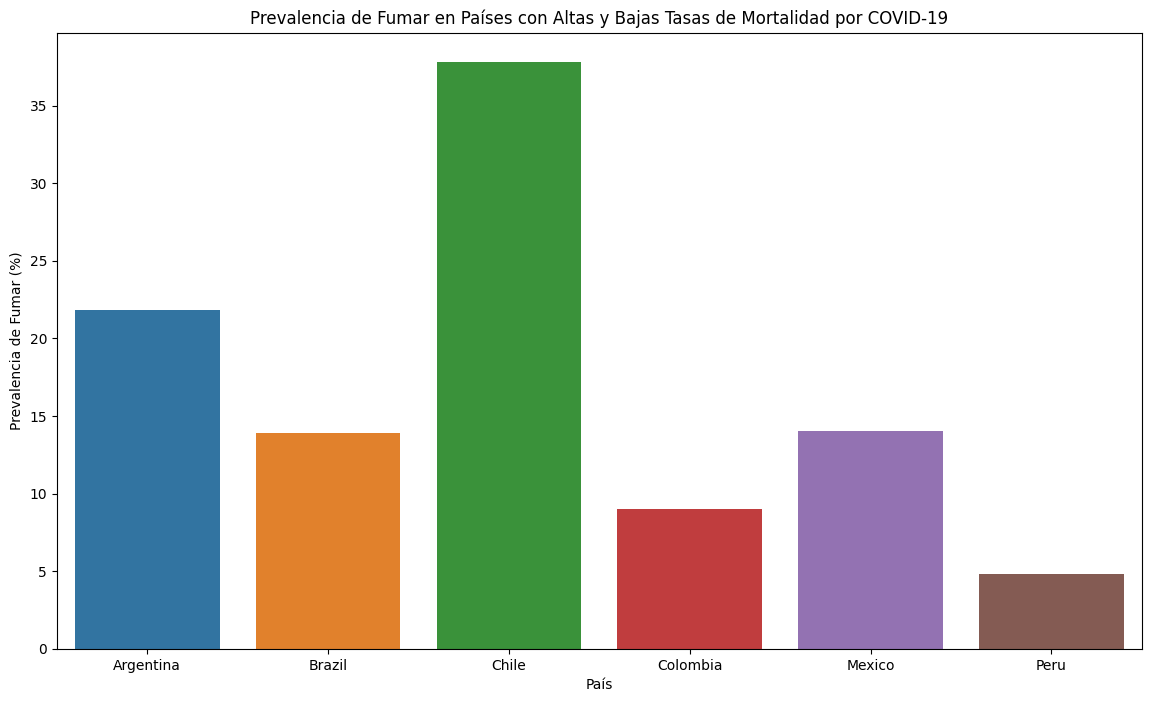

In [ ]:
#Prevalencia de diabetes.
top_countries = Data_latinoamerica_AVANCE3.groupby('country_name') ['cumulative_deceased'].max().nlargest (5).index
bottom_countries = Data_latinoamerica_AVANCE3.groupby('country_name') ['cumulative_deceased'].max().nsmallest(5).index
conditions_data = Data_latinoamerica_AVANCE3 [Data_latinoamerica_AVANCE3 ['country_name'].isin(top_countries.union(bottom_countries))]

plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de Diabetes (%)')
plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()

# Prevalencia de fumar.
plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title('Prevalencia de Fumar en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()

Evolución del Número de Muertes Diarias.


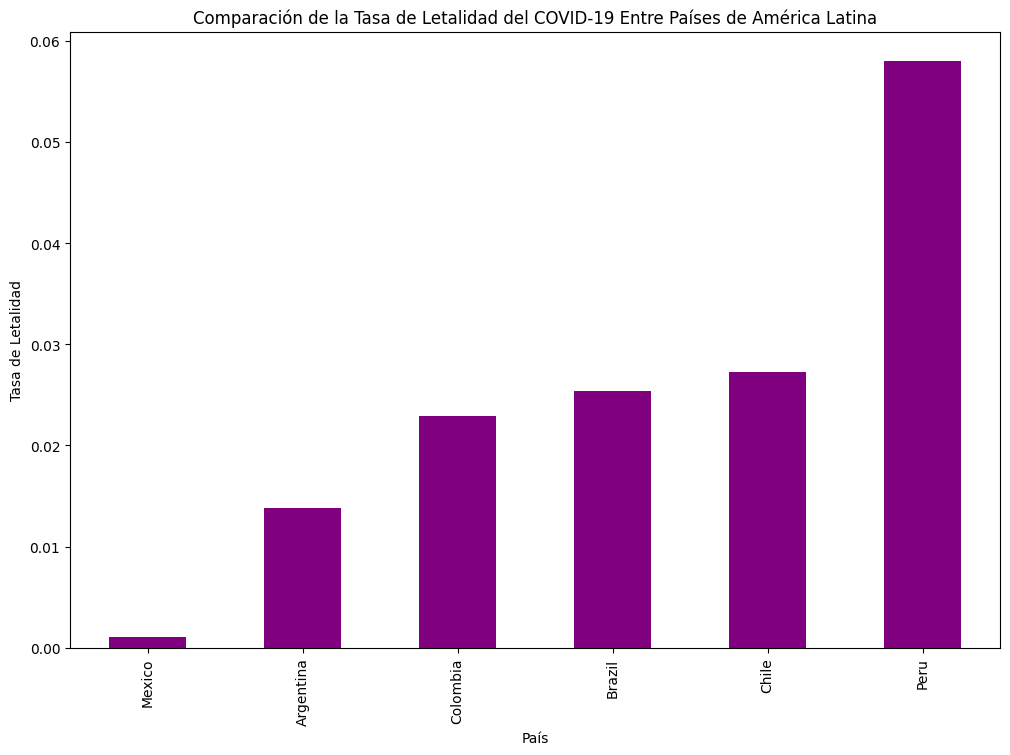

In [ ]:
import matplotlib.pyplot as plt

#Calcula la tasa de letalidad por país

Data_latinoamerica_AVANCE3['case_fatality_rate'] = Data_latinoamerica_AVANCE3['cumulative_deceased'] / Data_latinoamerica_AVANCE3['cumulative_confirmed']
Fatality_rates = Data_latinoamerica_AVANCE3.groupby('country_name') ['case_fatality_rate'].last().sort_values()

#Crea el gráfico de barras

plt.figure(figsize=(12, 8))
bars = Fatality_rates.plot(kind='bar', color='purple')

#Configura los ejes y el título del gráfico
plt.xlabel('País')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.ylabel('Tasa de Letalidad')

plt.show()

Relación entre la Cobertura de Vacunación y la Reducción de Casos

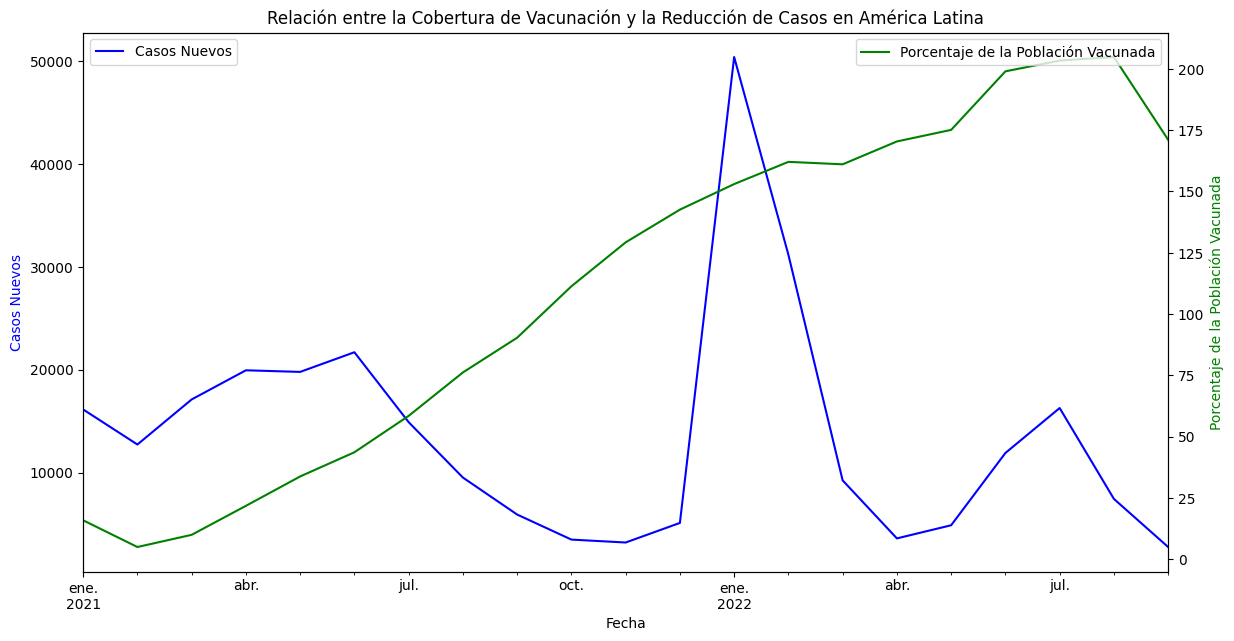

In [ ]:
#Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))
ax1= plt.gca()
ax2= ax1.twinx()

#crea percentajes de vacunacion
Data_latinoamerica_AVANCE3 ['percentage_vaccinated'] = (Data_latinoamerica_AVANCE3 ['cumulative_vaccine_doses_administered'] / Data_latinoamerica_AVANCE3 ['population']) * 100
Data_latinoamerica_AVANCE3.resample('ME').mean(numeric_only=True) ['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
Data_latinoamerica_AVANCE3.resample('ME').mean(numeric_only=True) ['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')
                                                                                                
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2. legend(loc='upper right')

plt.show()

Análisis Temporal de la Mortalidad

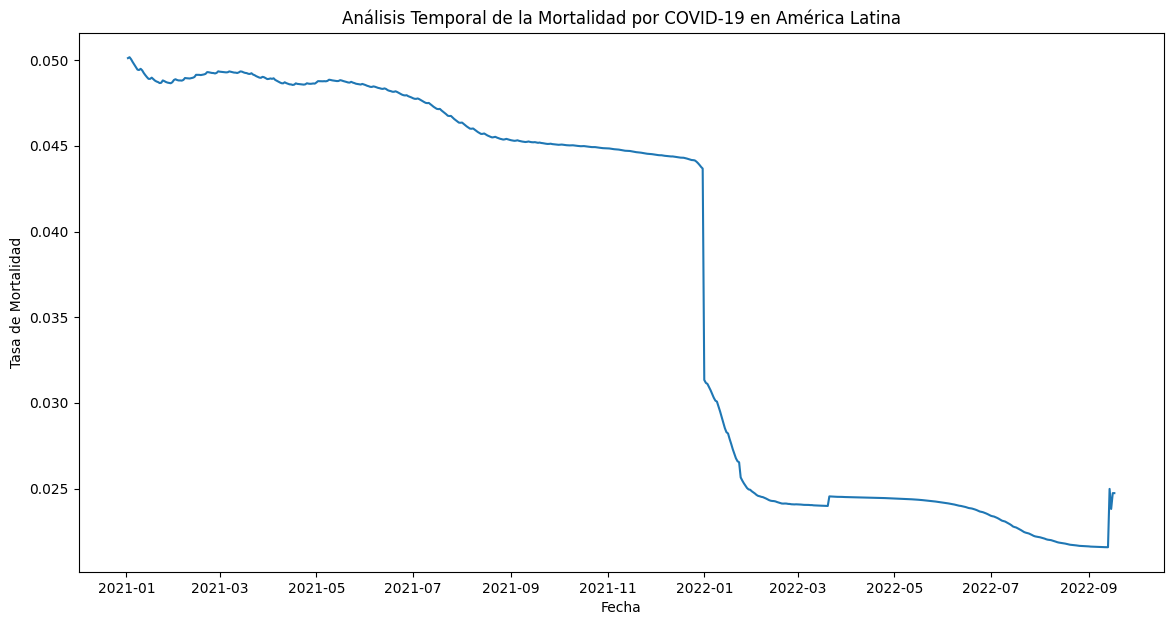

In [ ]:
#cómo evolucionó la mortalidad
Data_latinoamerica_AVANCE3 ['mortality_rate'] = Data_latinoamerica_AVANCE3 ['cumulative_deceased'] / Data_latinoamerica_AVANCE3['cumulative_confirmed']
plt.figure(figsize=(14, 7))
sns.lineplot(data=Data_latinoamerica_AVANCE3, x='date', y='mortality_rate', estimator='mean', errorbar=None)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show ()

Evolución de Casos Activos vs. Recuperados


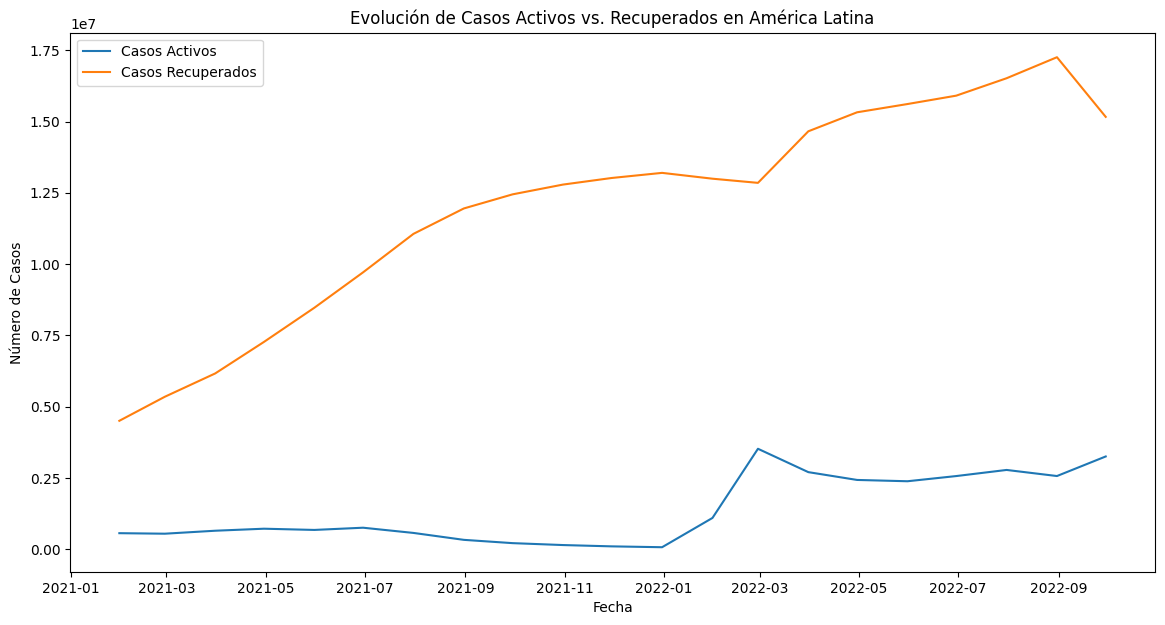

In [ ]:
#como evolucionan los casos activos y recuperados en América Latina
Data_latinoamerica_AVANCE3['active_cases'] = Data_latinoamerica_AVANCE3['cumulative_confirmed'] -  Data_latinoamerica_AVANCE3['cumulative_deceased'] - Data_latinoamerica_AVANCE3 ["cumulative_recovered"]
plt.figure(figsize=(14, 7))
sns.lineplot(data=Data_latinoamerica_AVANCE3.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=Data_latinoamerica_AVANCE3.resample("ME").mean(numeric_only=True ), x='date', y='cumulative_recovered', label='Casos Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

Comparación de la Situación Actual

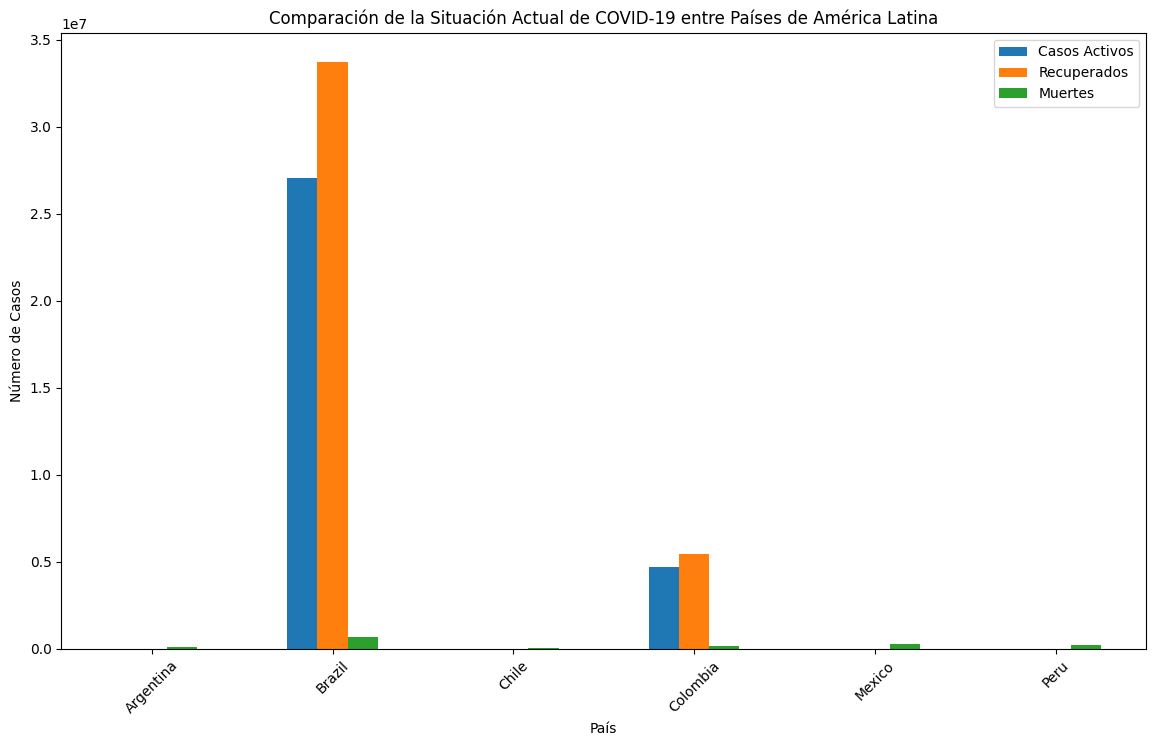

In [ ]:
#No se tienen dato pero hay datos de recuperados y muertes en algunos paises
current_situation = Data_latinoamerica_AVANCE3.groupby('country_name').max() [['active_cases', 'cumulative_recovered', 'cumulative_deceased']] 
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show ()

In [ ]:
#Se guarda en nuevo dataset para exportaren power bi ya que se crearon nuevas columnas
Data_latinoamerica_AVANCE3.to_csv ("datosfiltradosfinal.csv",index=True)

NameError: name 'Data_latinoamerica_AVANCE3' is not defined